In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load the dataset
df = pd.read_csv("all_players.csv")

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17326 entries, 0 to 17325
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            17326 non-null  object 
 1   Nation          17326 non-null  object 
 2   Club            17326 non-null  object 
 3   Position        17326 non-null  object 
 4   Age             17326 non-null  int64  
 5   Overall         17326 non-null  int64  
 6   Pace            17326 non-null  int64  
 7   Shooting        17326 non-null  int64  
 8   Passing         17326 non-null  int64  
 9   Dribbling       17326 non-null  int64  
 10  Defending       17326 non-null  int64  
 11  Physicality     17326 non-null  int64  
 12  Acceleration    17326 non-null  int64  
 13  Sprint          17326 non-null  int64  
 14  Positioning     17326 non-null  int64  
 15  Finishing       17326 non-null  int64  
 16  Shot            17326 non-null  int64  
 17  Long            17326 non-null 

In [3]:
# Summary statistics
print(df.describe())

# Count the number of missing values in each column
print(df.isnull().sum())

                Age       Overall          Pace      Shooting       Passing  \
count  17326.000000  17326.000000  17326.000000  17326.000000  17326.000000   
mean      25.781658     66.980723     68.286448     54.803763     59.261284   
std        4.655255      6.981987     10.657137     13.872357      9.776640   
min       17.000000     47.000000     27.000000     19.000000     25.000000   
25%       22.000000     63.000000     62.000000     45.000000     53.000000   
50%       25.000000     67.000000     69.000000     57.000000     60.000000   
75%       29.000000     71.000000     76.000000     65.000000     66.000000   
max       43.000000     91.000000     97.000000     93.000000     94.000000   

          Dribbling     Defending   Physicality  Acceleration        Sprint  \
count  17326.000000  17326.000000  17326.000000  17326.000000  17326.000000   
mean      56.852822     51.510216     65.663858     64.844049     65.043634   
std       19.041291     16.439490      9.485501    

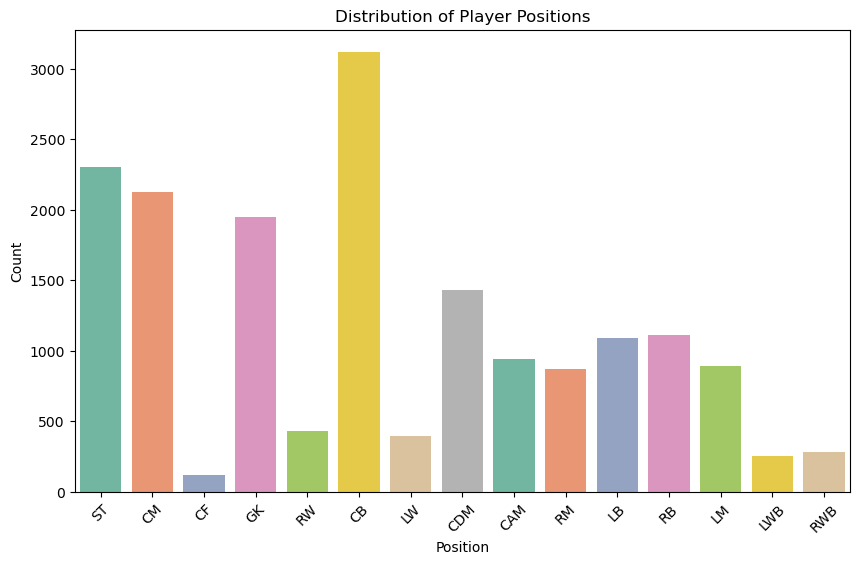

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


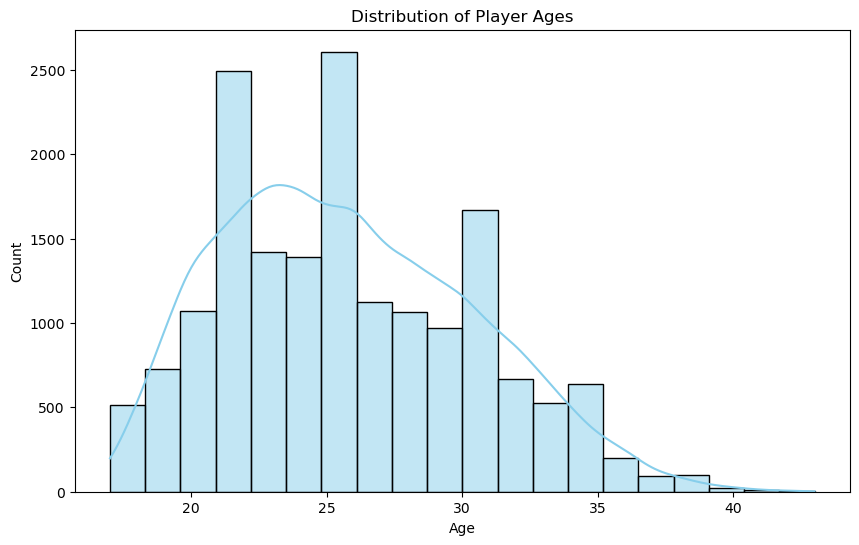

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


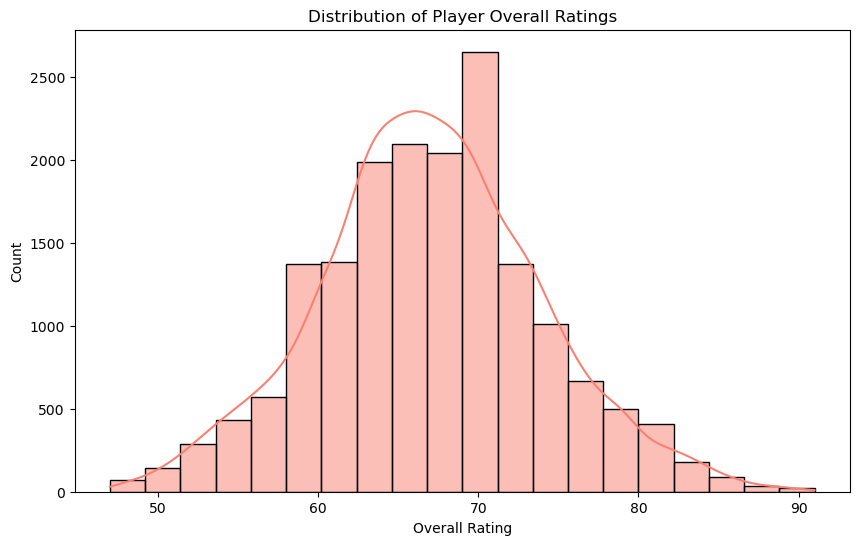

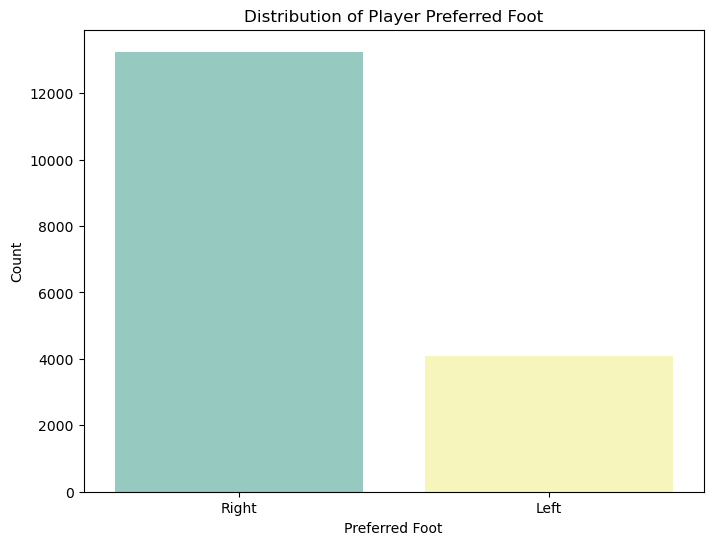

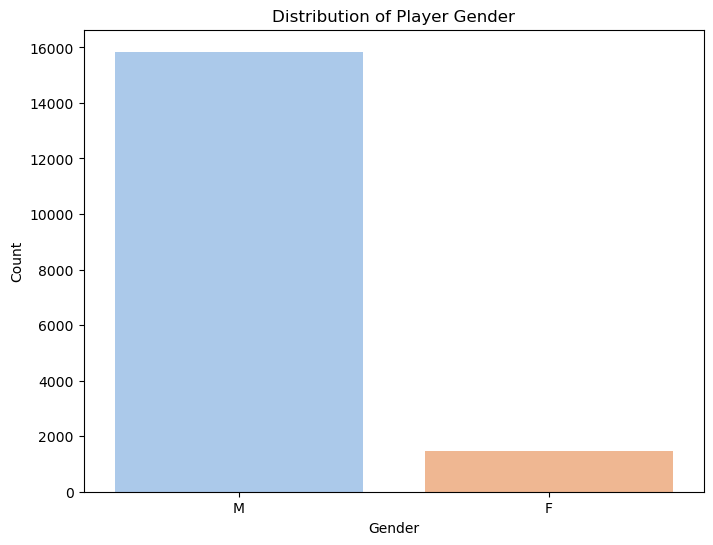

In [4]:
# Distribution of player positions
plt.figure(figsize=(10, 6))
sns.countplot(x='Position', data=df, palette='Set2')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of player ages
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



# Distribution of player overall ratings
plt.figure(figsize=(10, 6))
sns.histplot(x='Overall', data=df, bins=20, kde=True, color='salmon')
plt.title('Distribution of Player Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

# Distribution of player preferred foot
plt.figure(figsize=(8, 6))
sns.countplot(x='Preferred foot', data=df, palette='Set3')
plt.title('Distribution of Player Preferred Foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Count')
plt.show()

# Distribution of player gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Distribution of Player Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

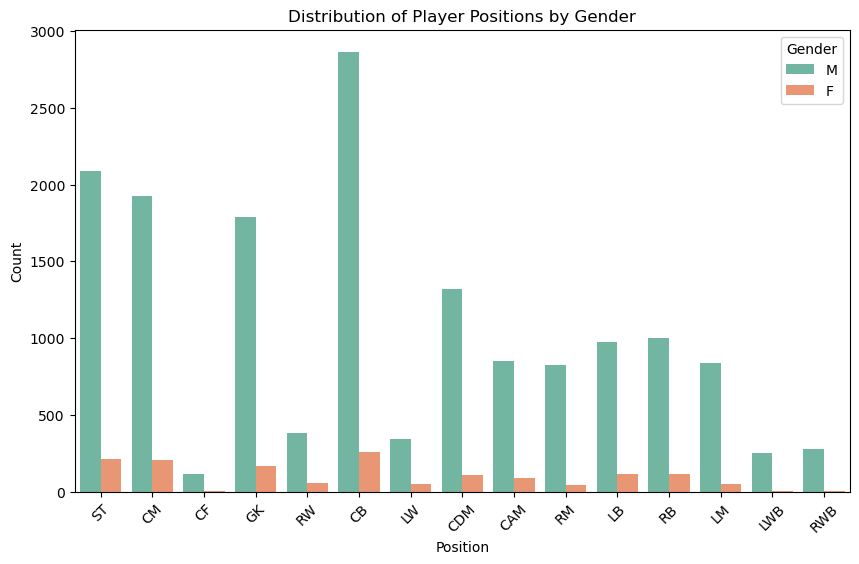

In [5]:
# Distribution of player positions by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Position', data=df, hue='Gender', palette='Set2')
plt.title('Distribution of Player Positions by Gender')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


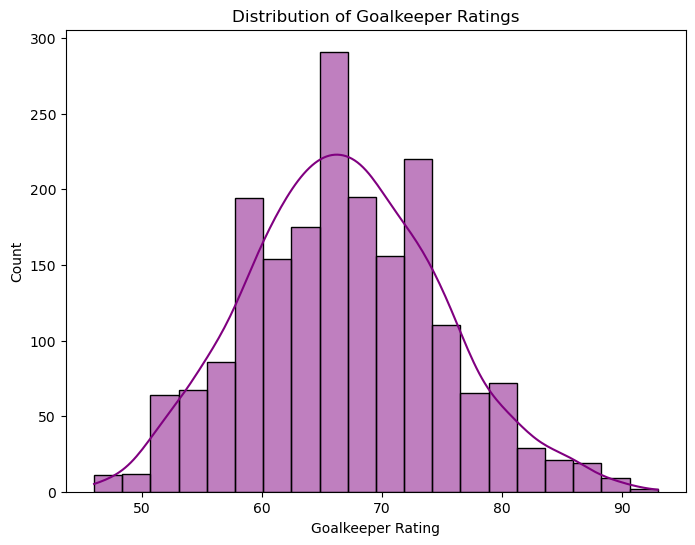

In [6]:
# Distribution of goalkeeper ratings
plt.figure(figsize=(8, 6))
sns.histplot(x='GK', data=df, bins=20, kde=True, color='purple')
plt.title('Distribution of Goalkeeper Ratings')
plt.xlabel('Goalkeeper Rating')
plt.ylabel('Count')
plt.show()

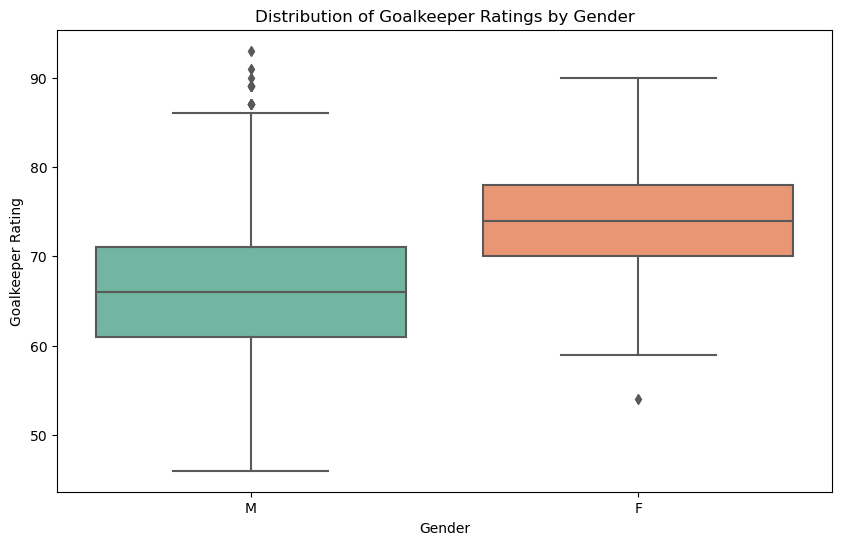

In [7]:
# Distribution of goalkeeper ratings by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='GK', data=df, palette='Set2')
plt.title('Distribution of Goalkeeper Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Goalkeeper Rating')
plt.show()

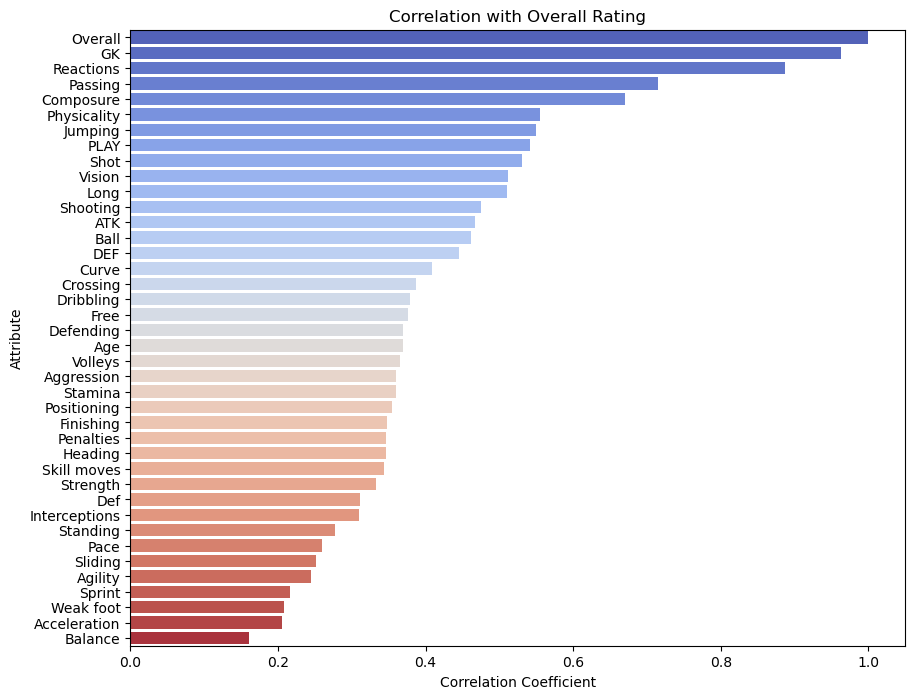

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation with the 'Overall' column
correlation = numeric_df.corr()['Overall'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')
plt.title('Correlation with Overall Rating')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Attribute')
plt.show()


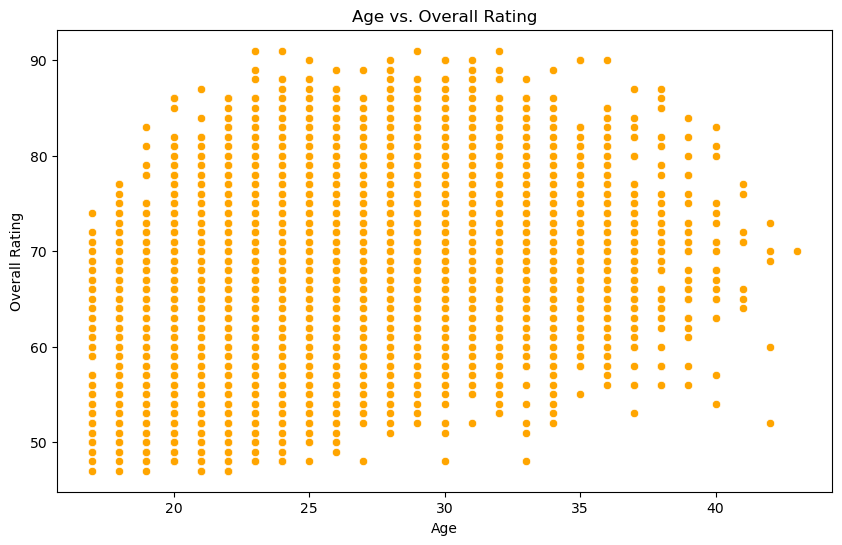

In [9]:
# Age vs. Overall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Overall', data=df, color='orange')
plt.title('Age vs. Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

<Figure size 800x600 with 0 Axes>

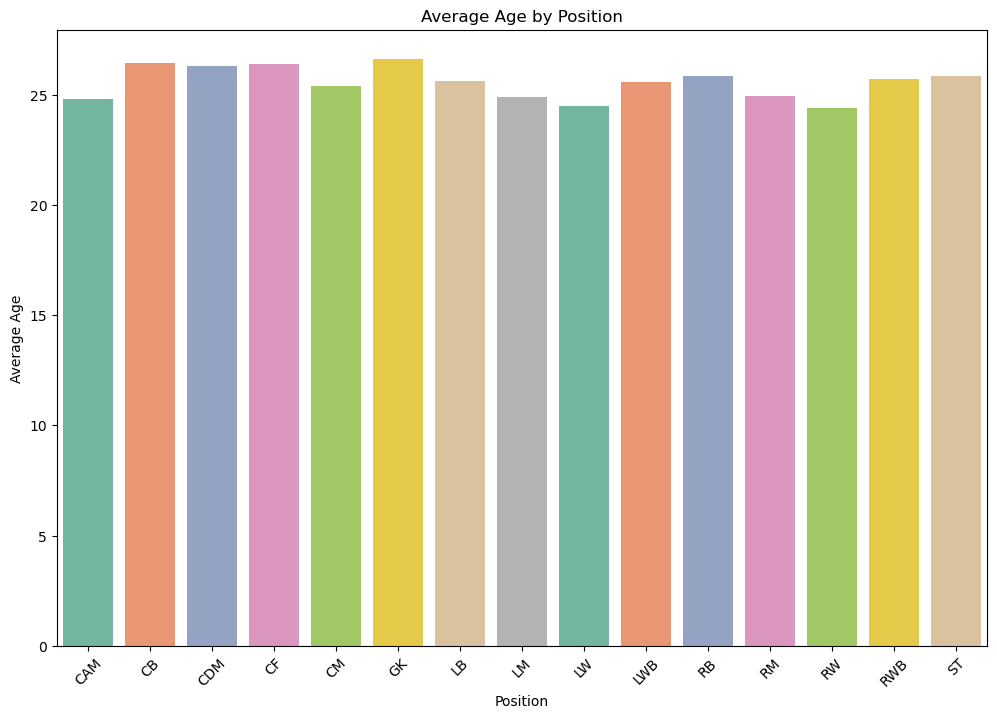

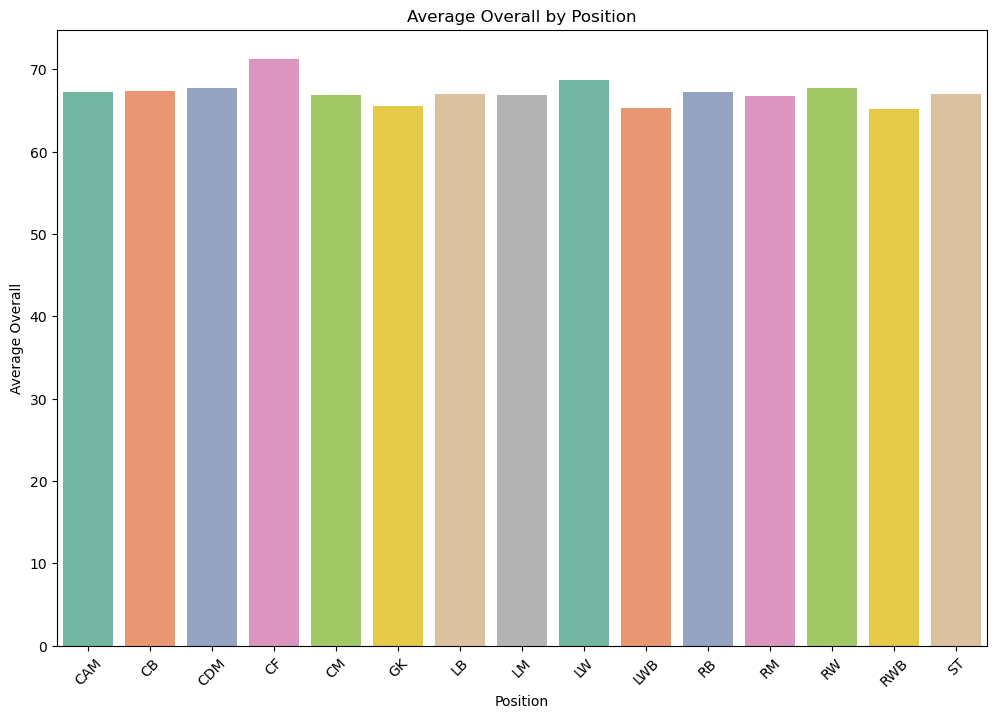

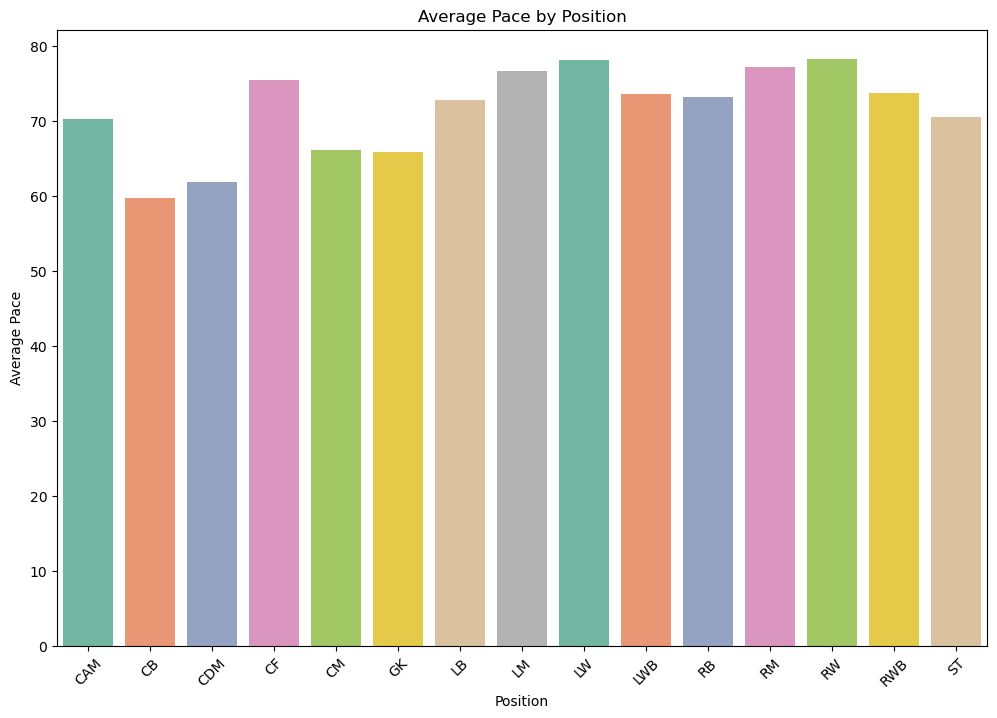

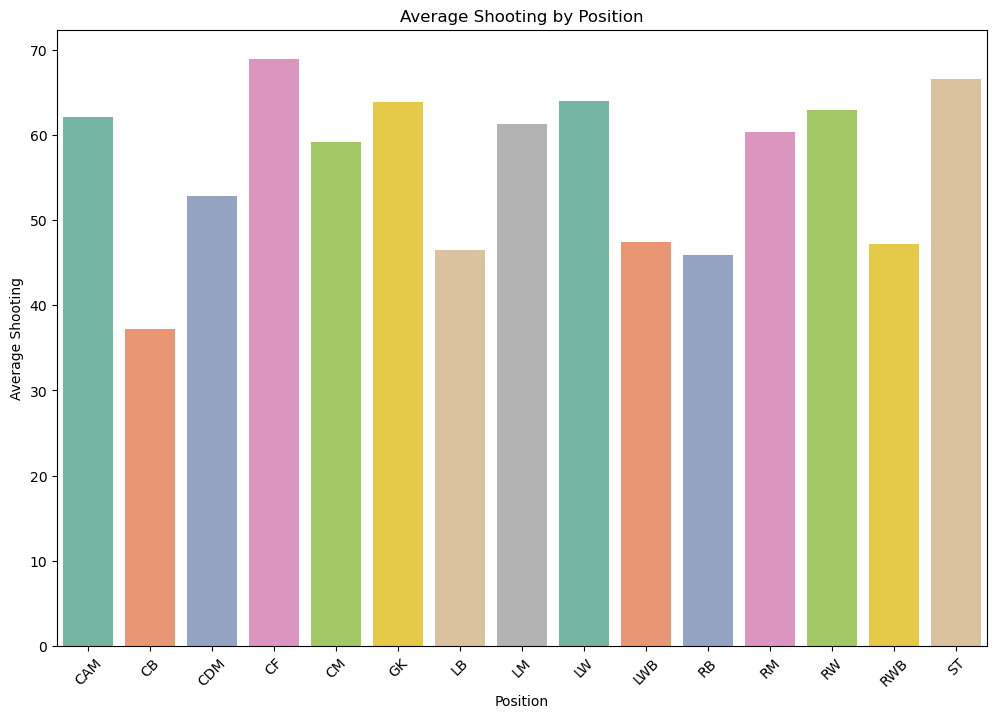

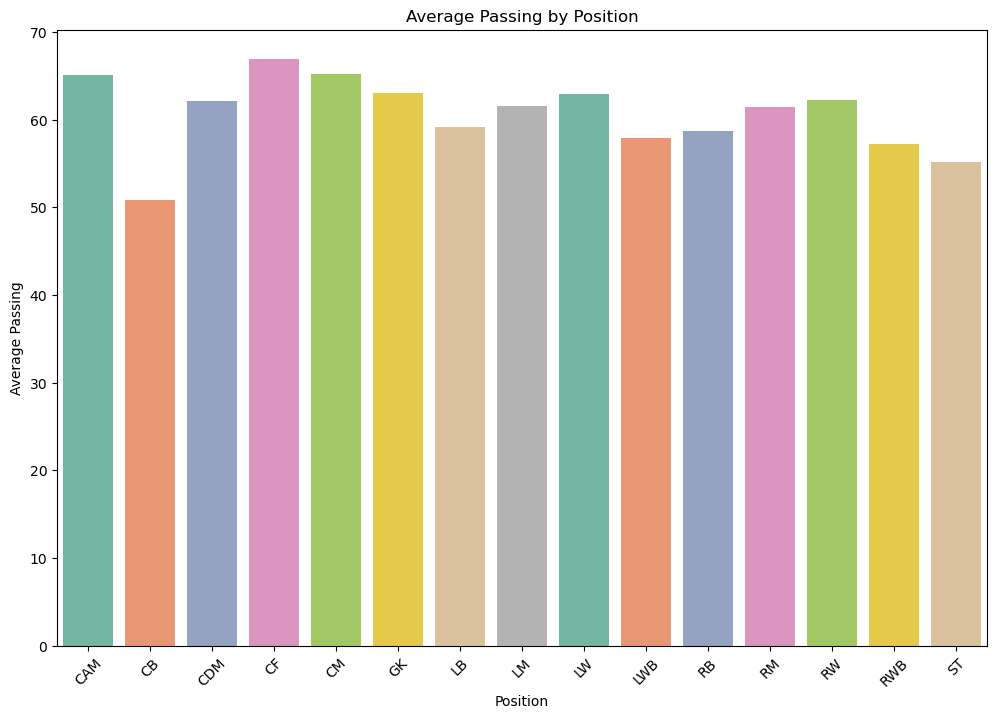

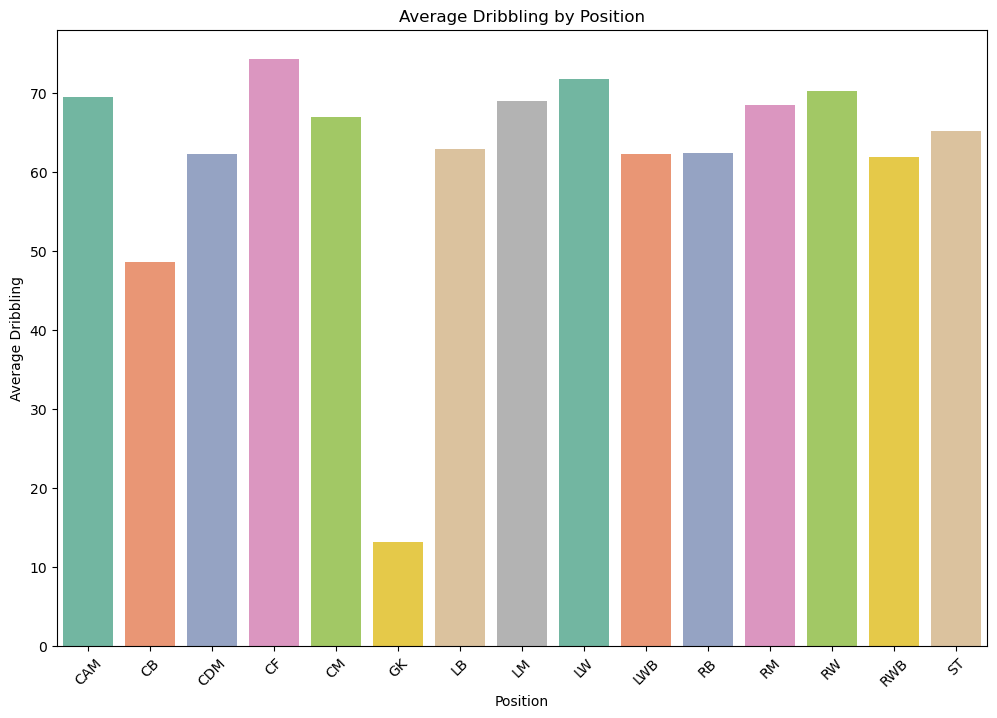

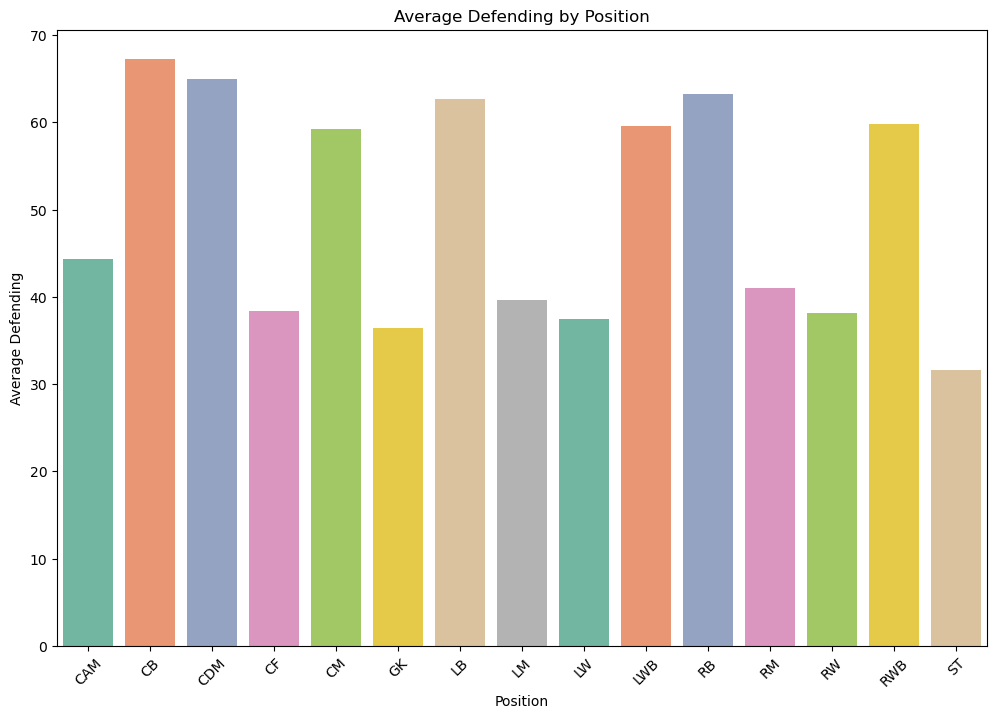

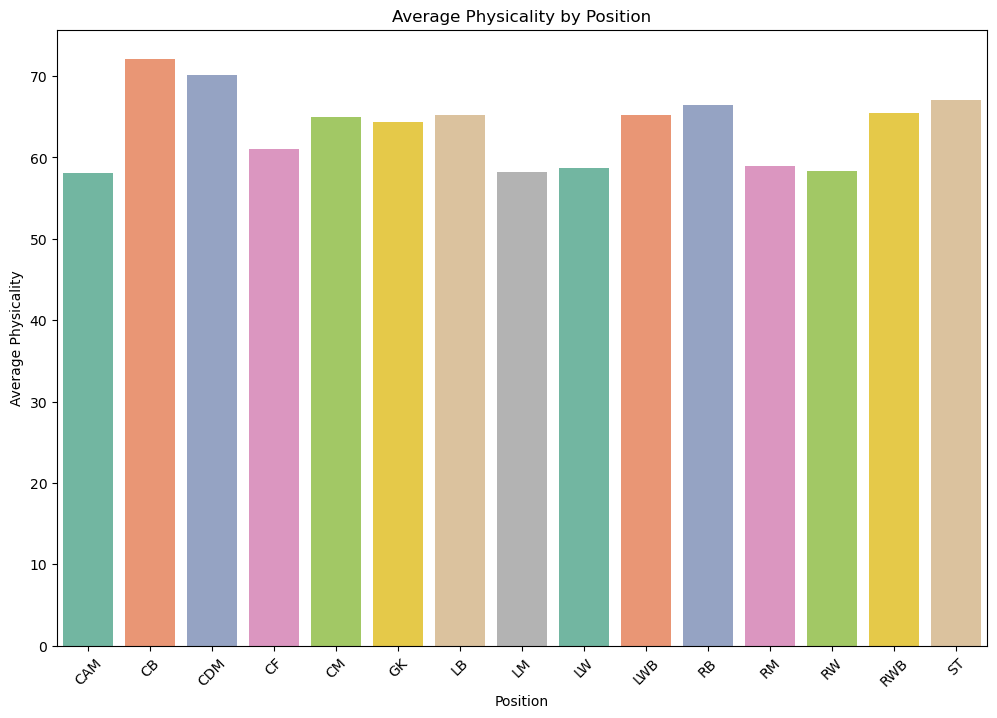

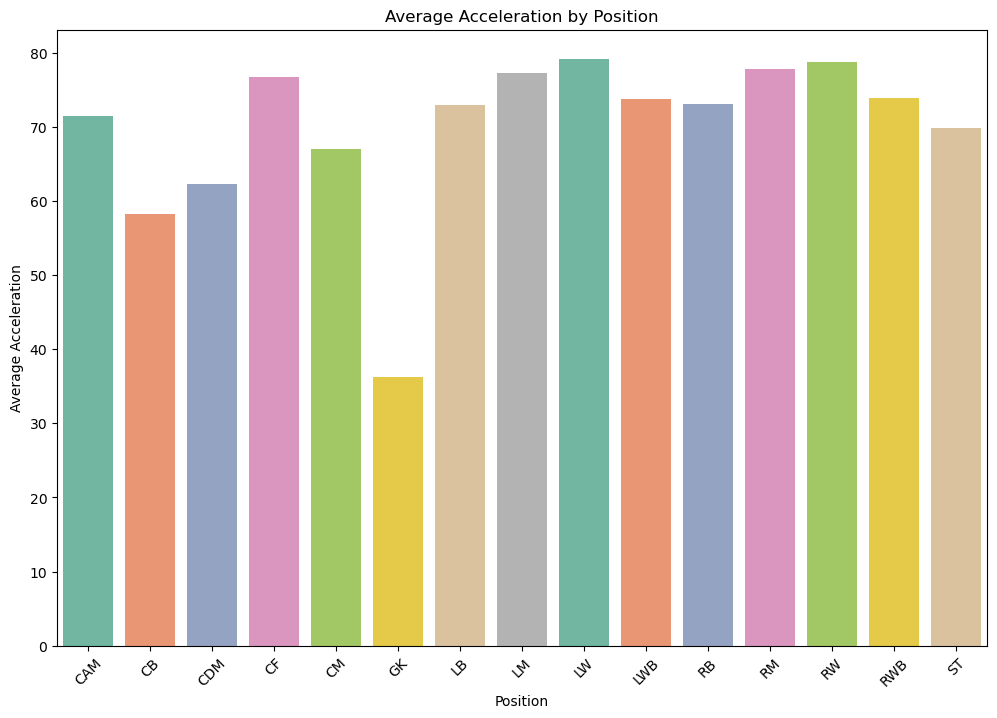

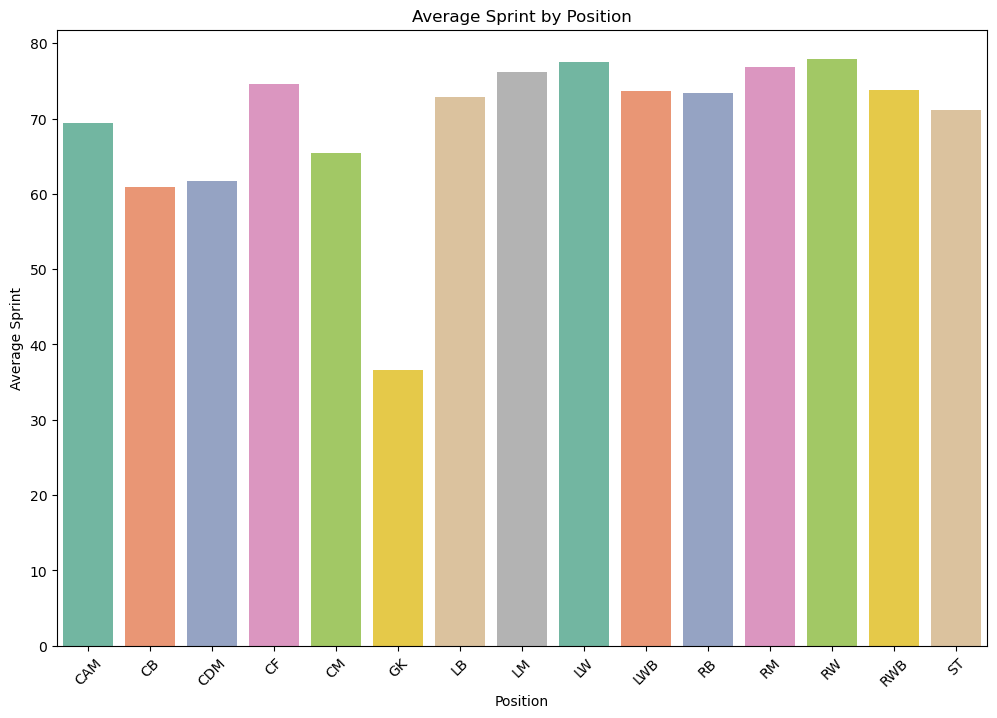

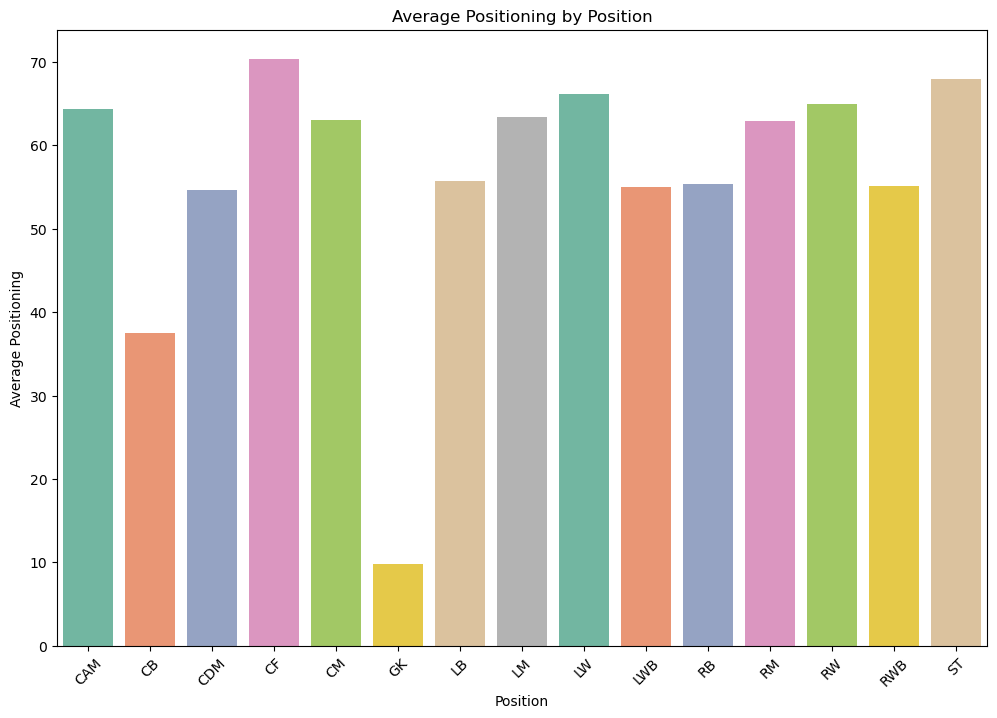

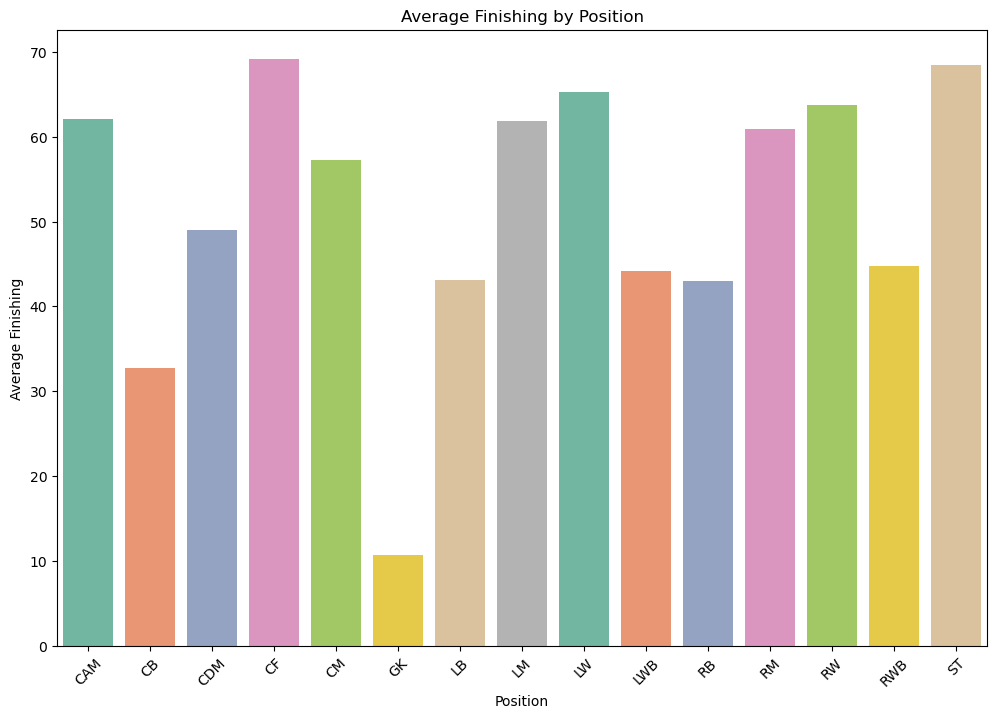

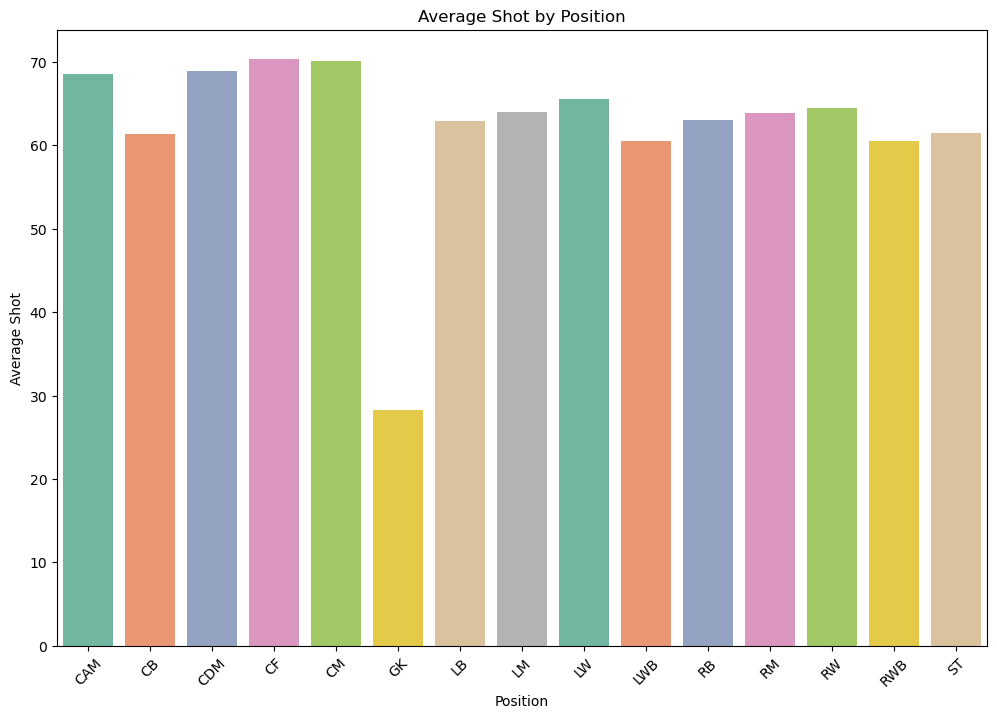

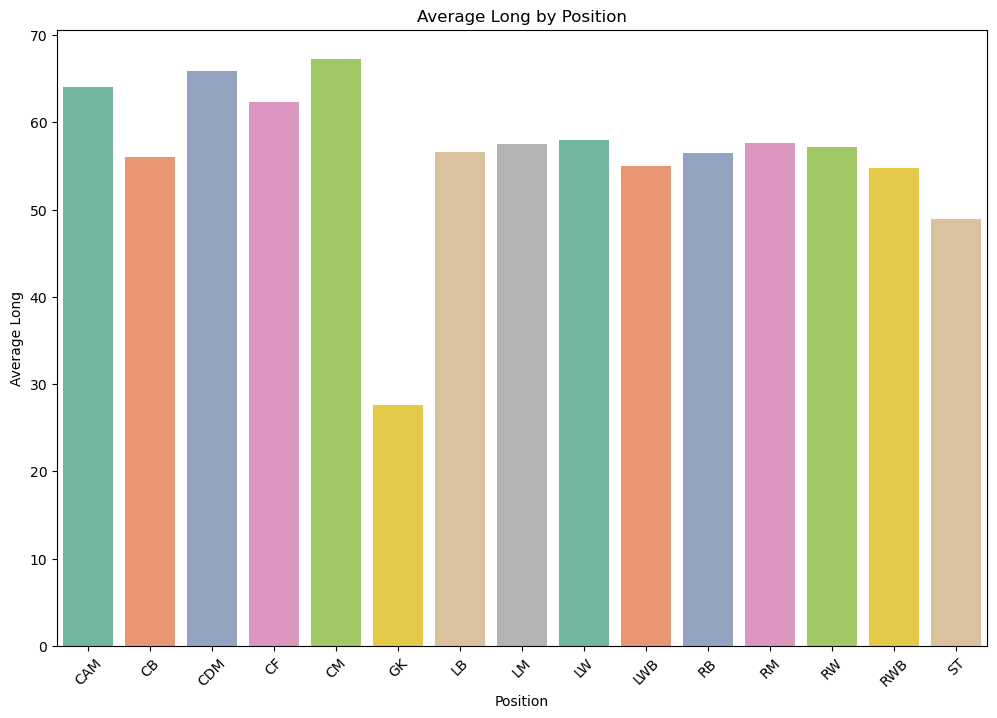

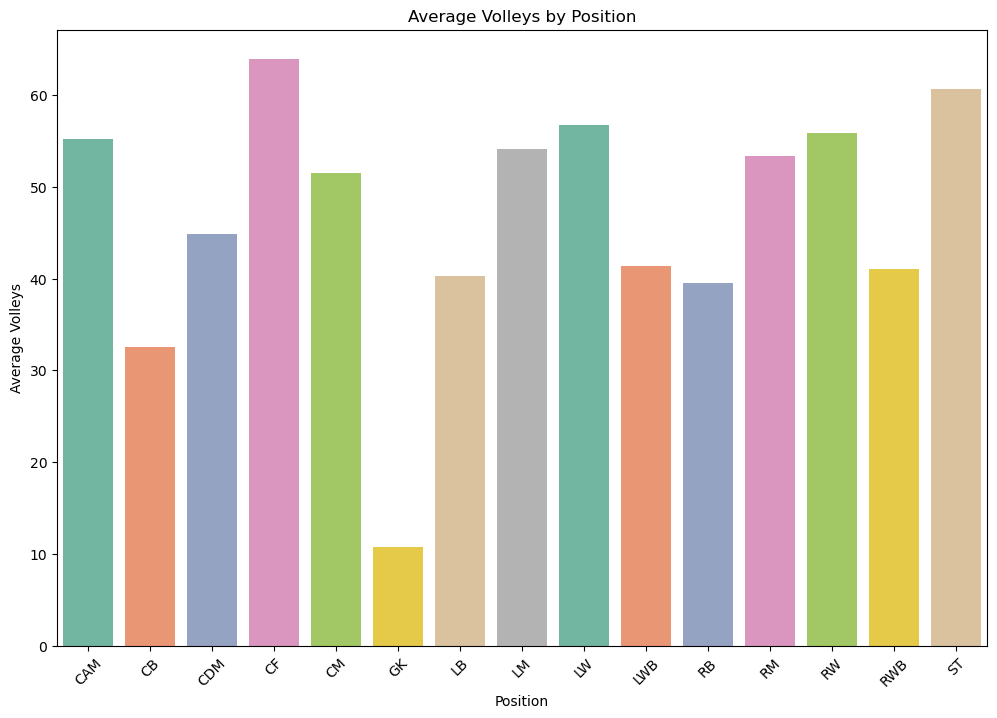

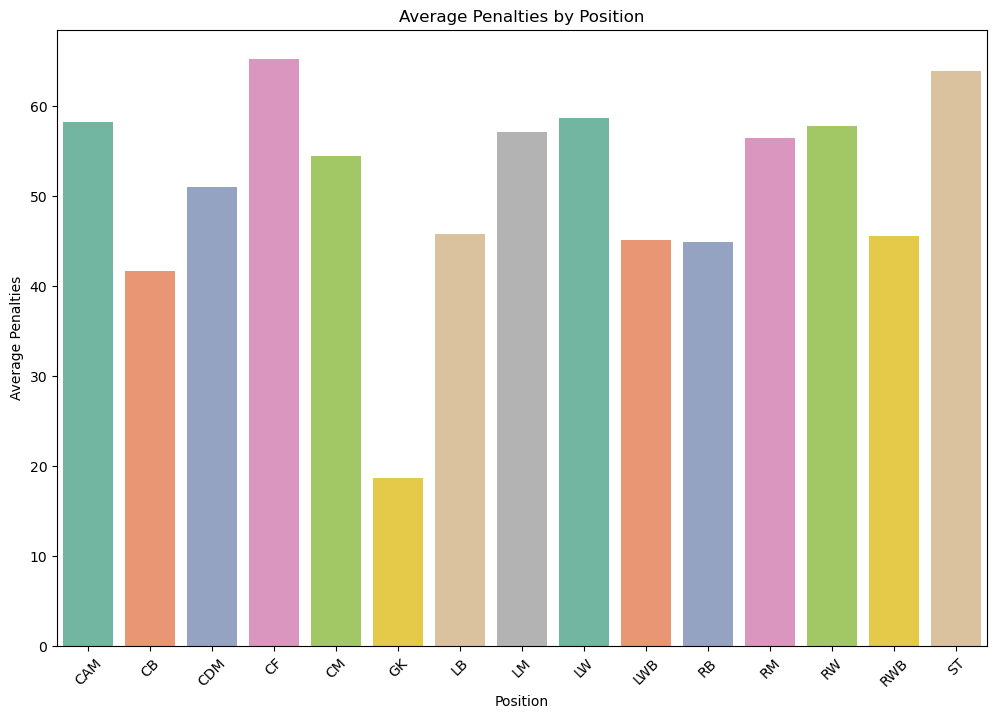

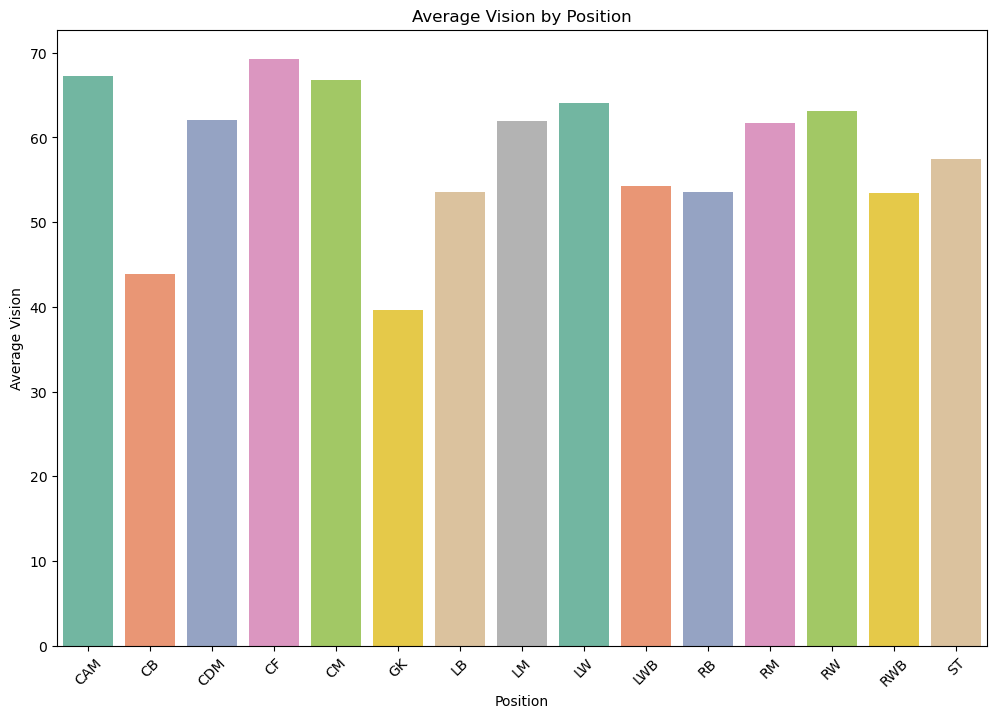

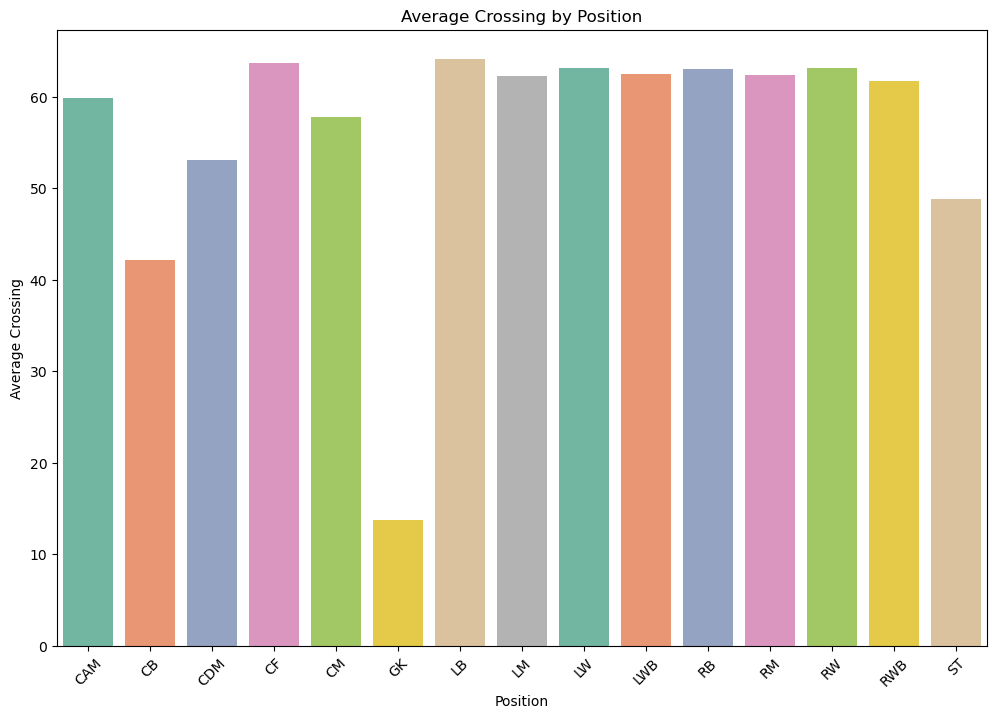

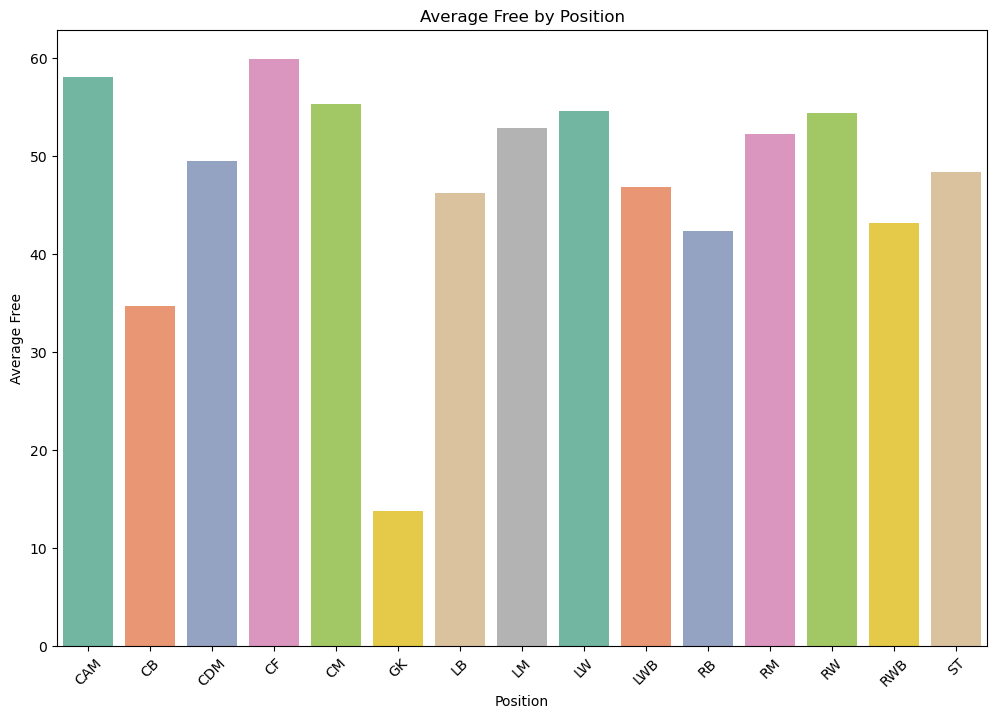

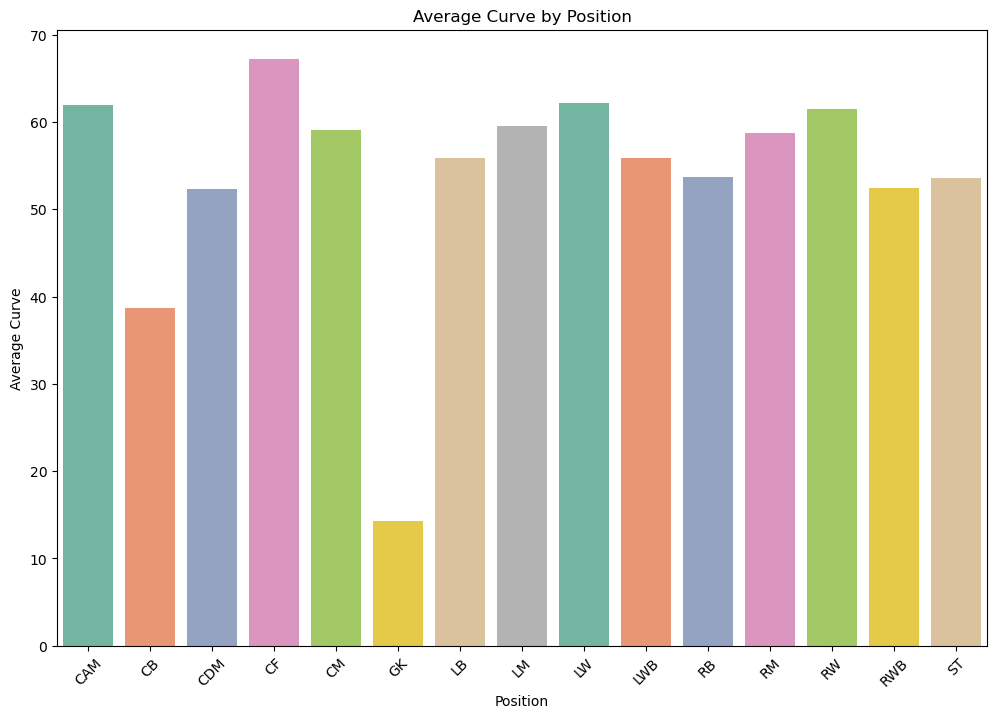

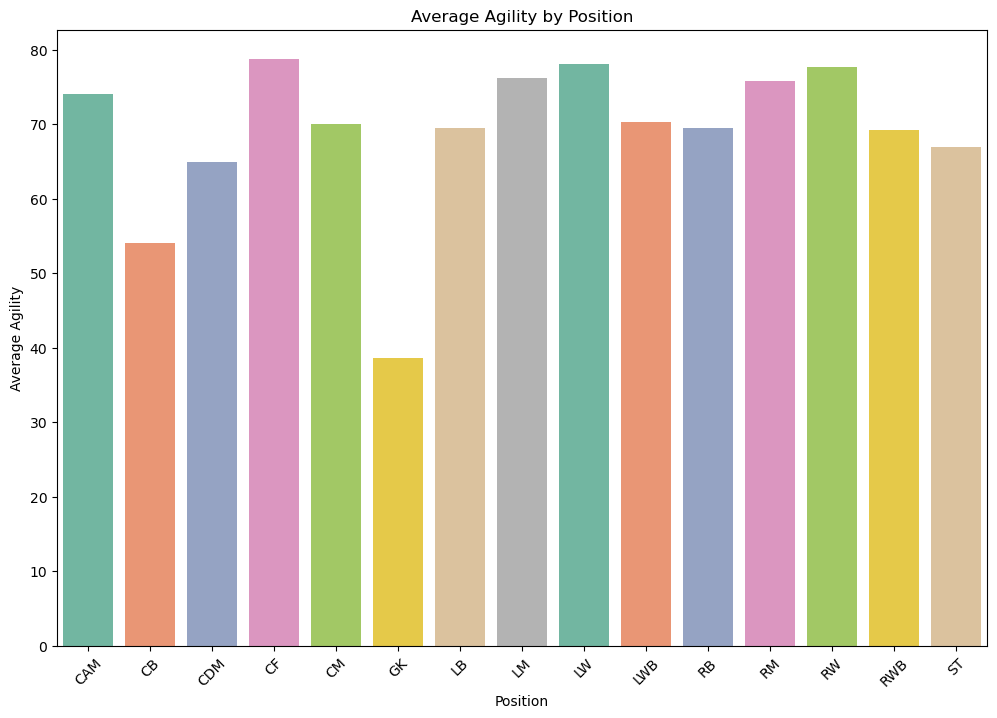

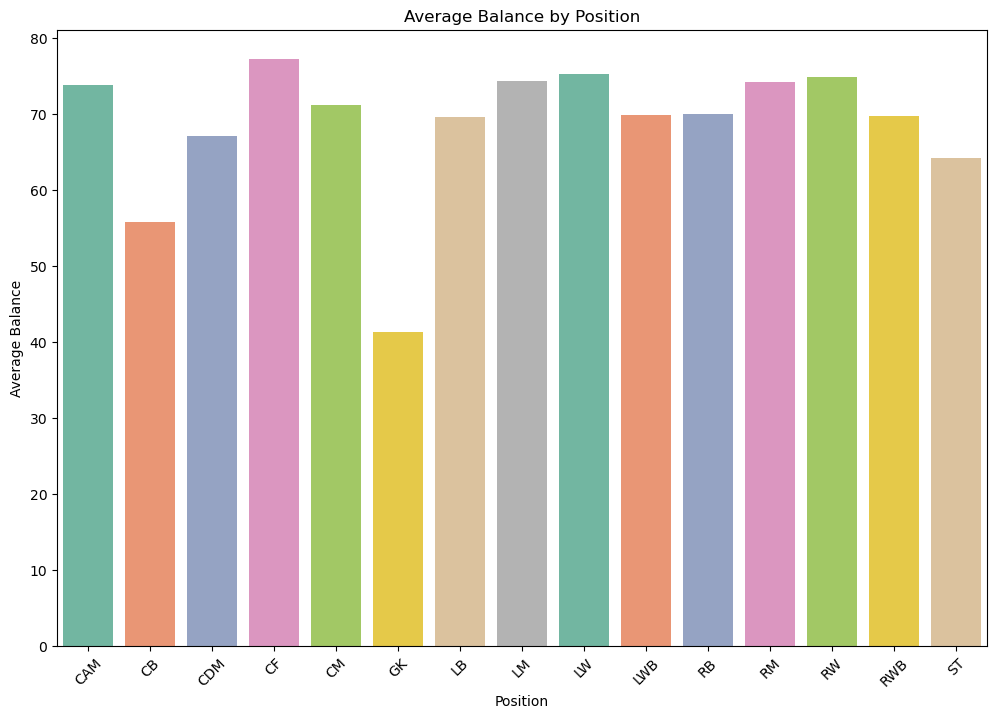

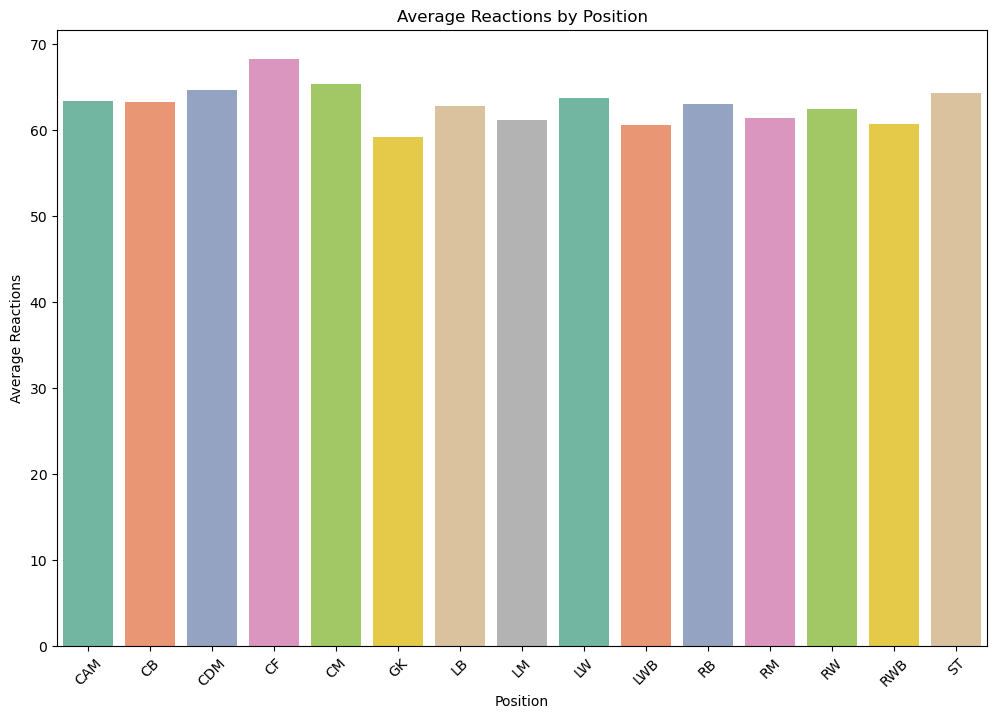

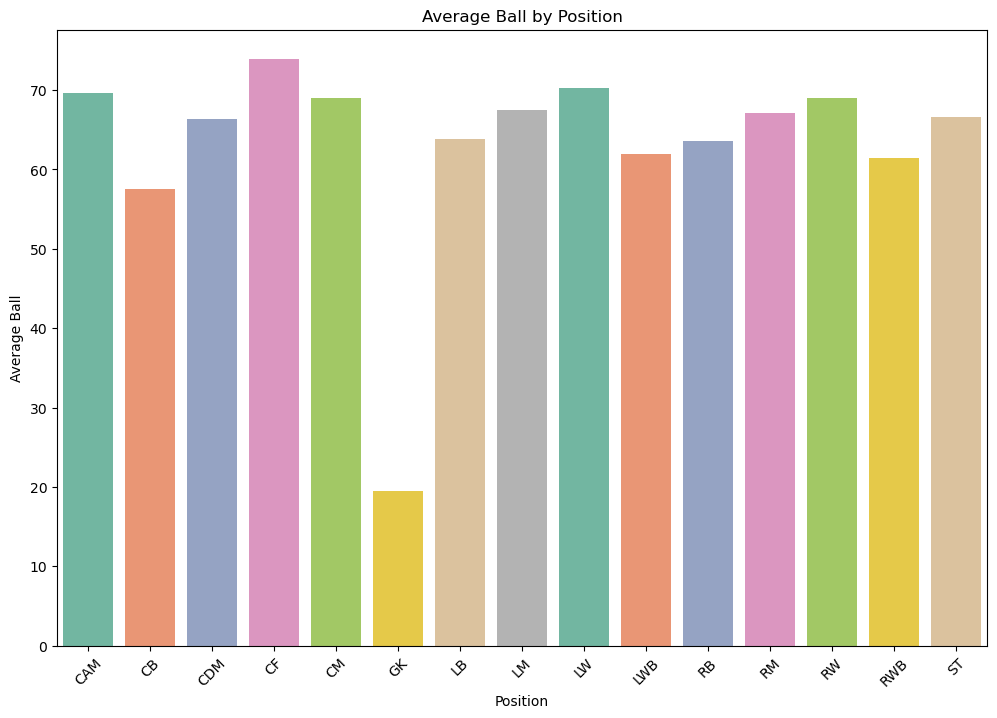

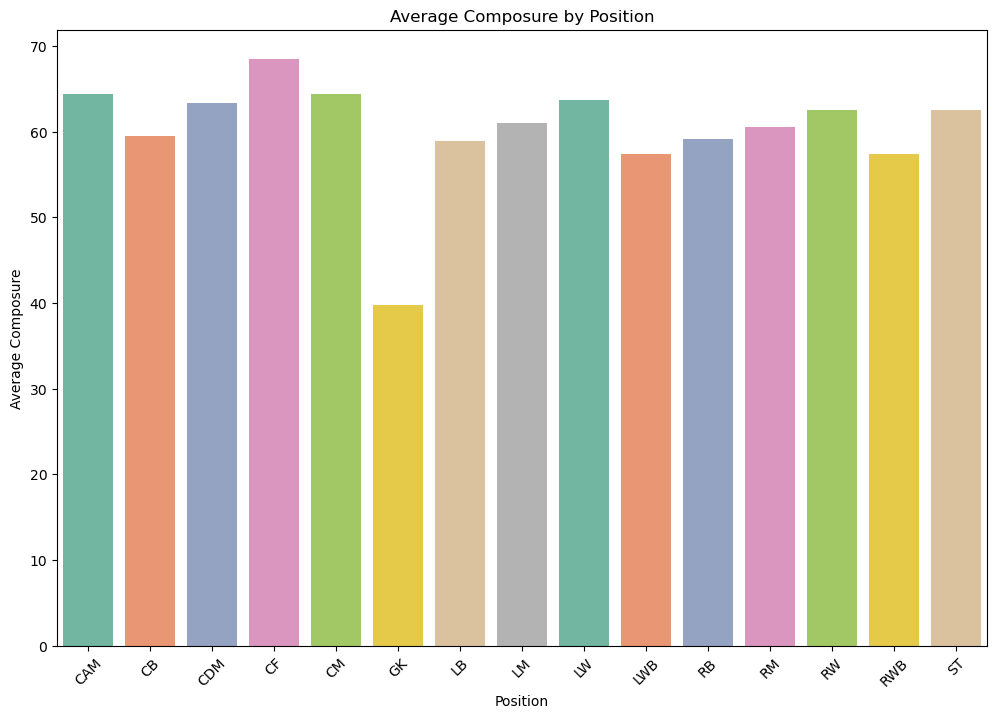

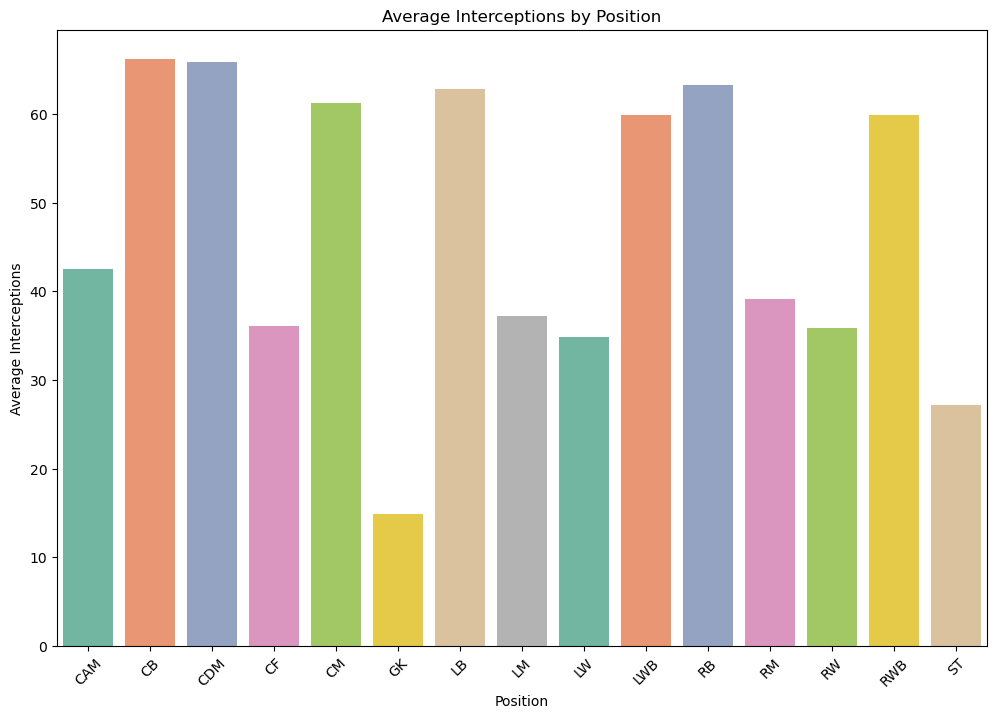

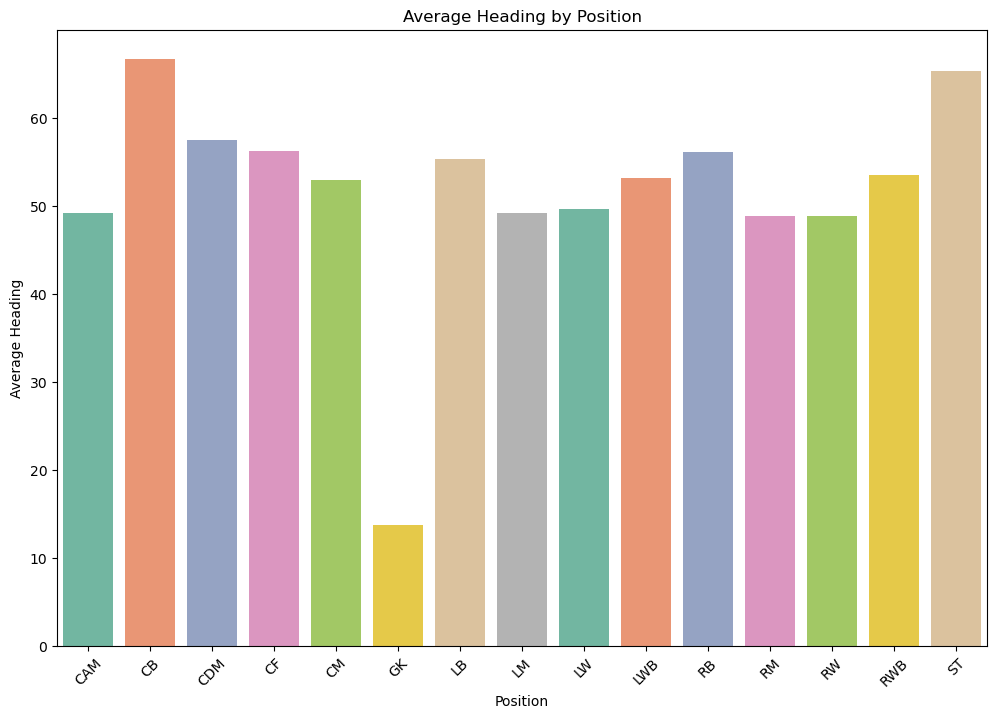

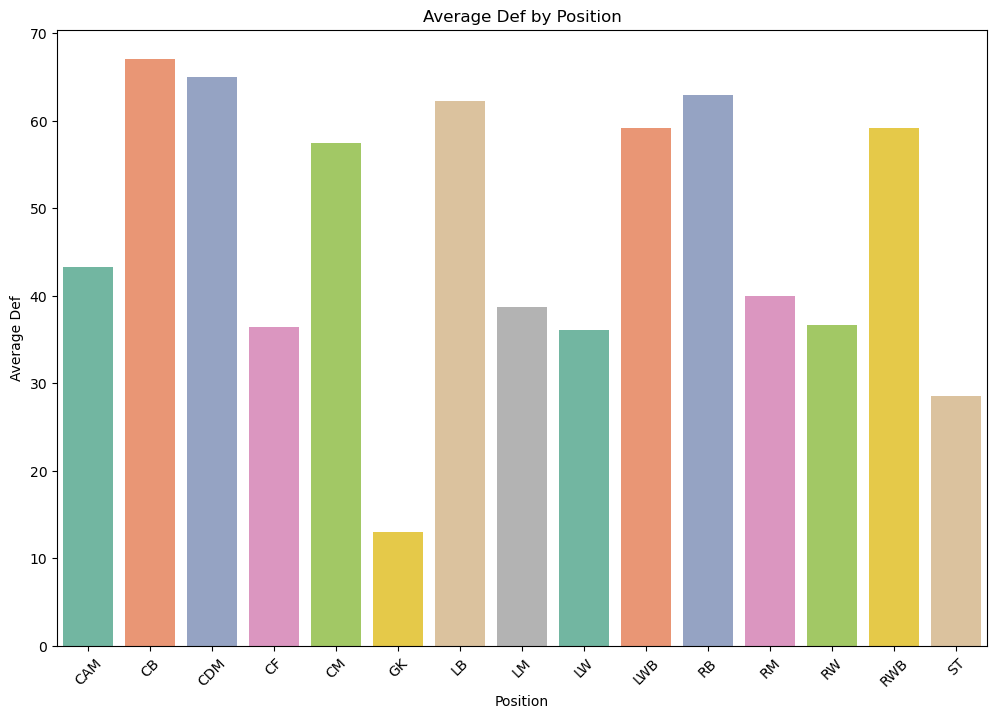

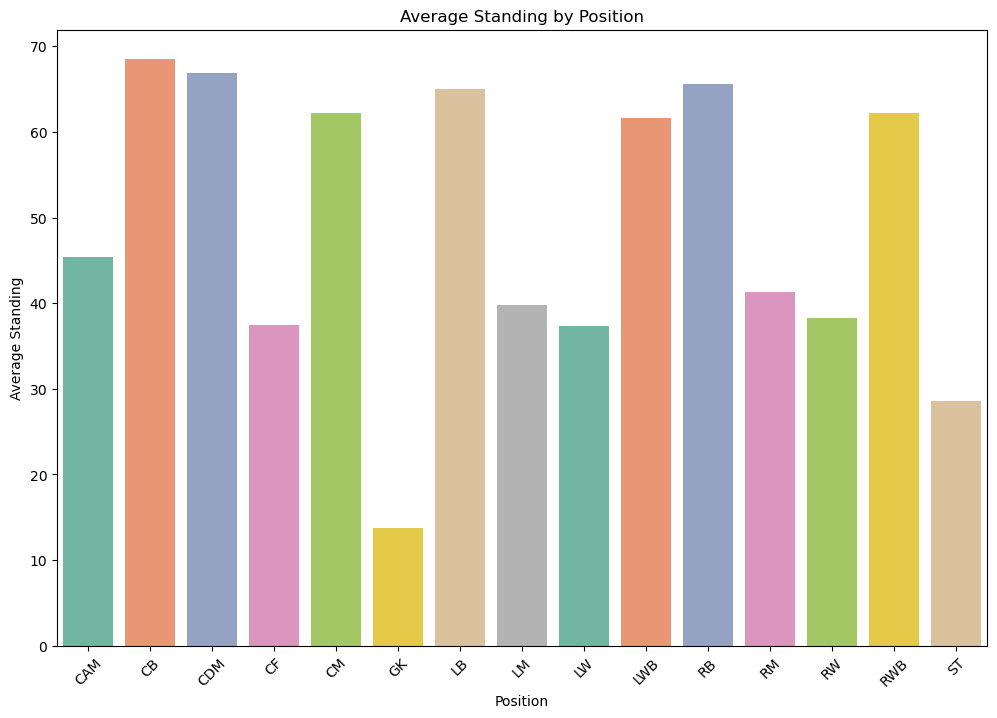

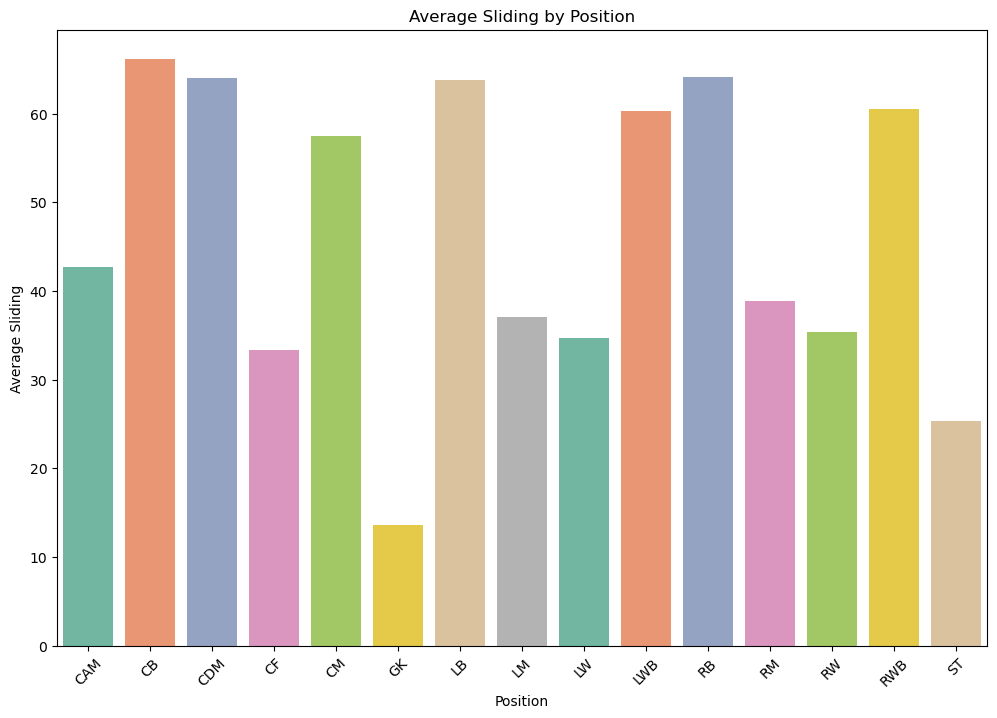

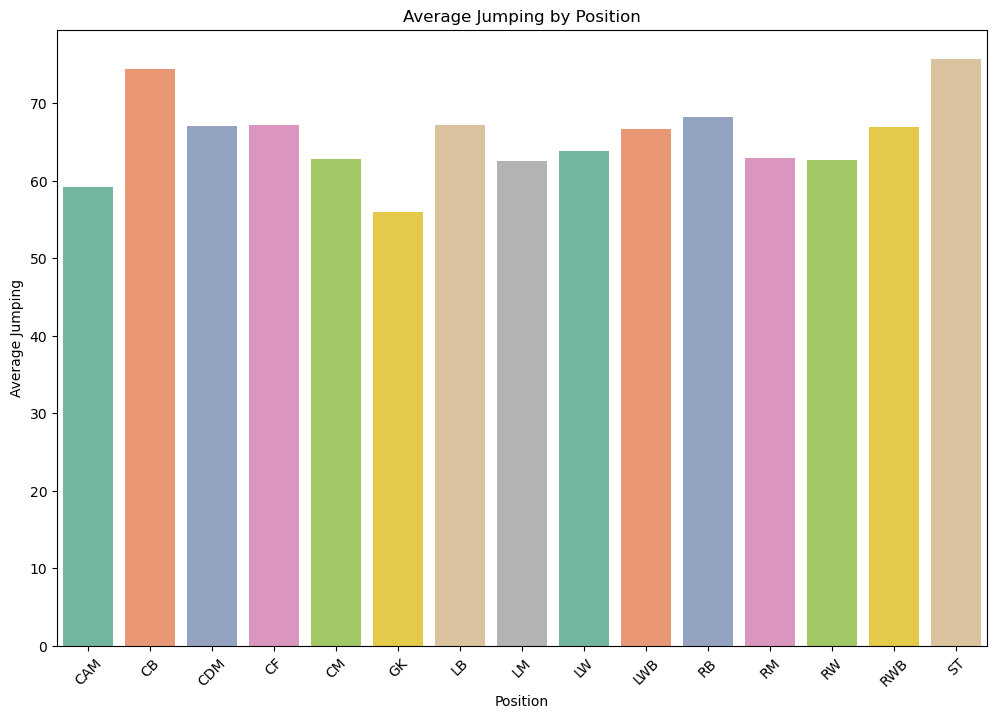

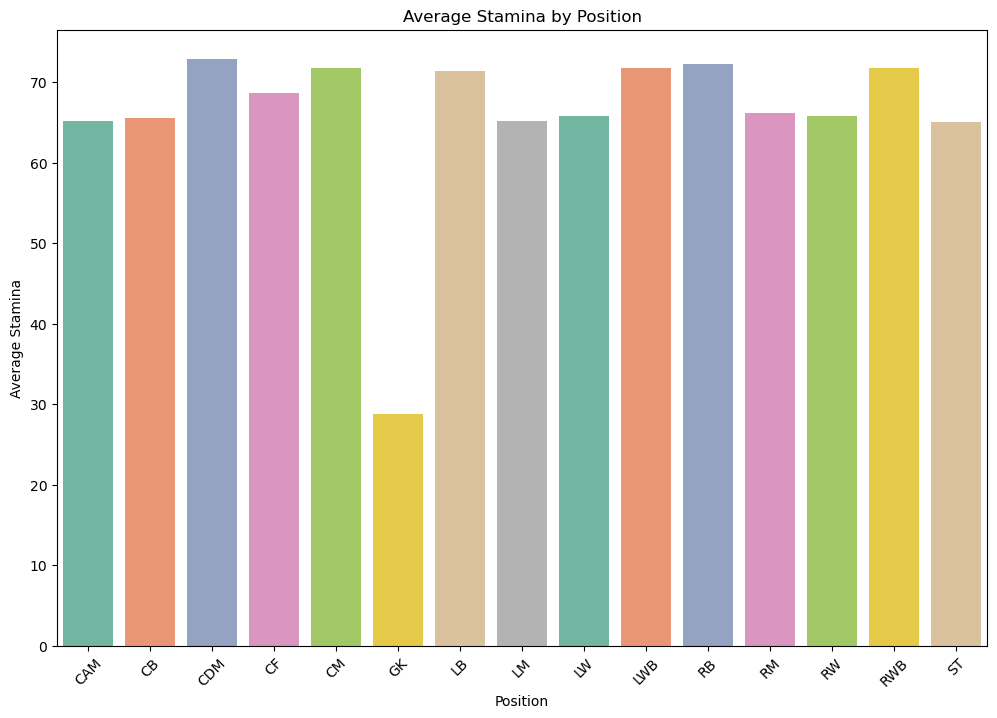

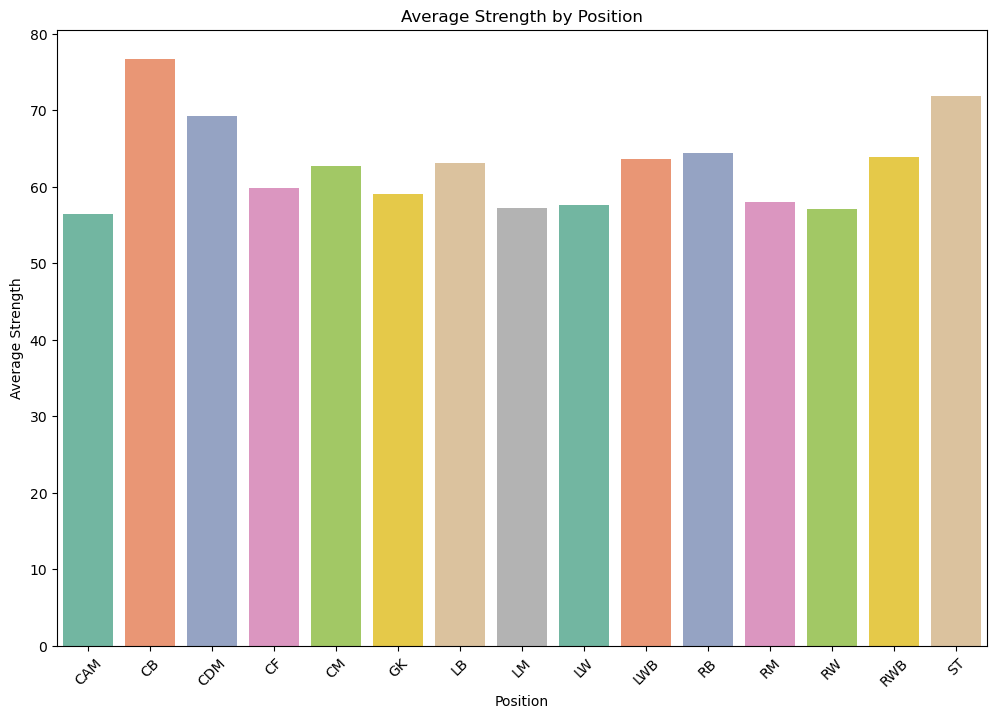

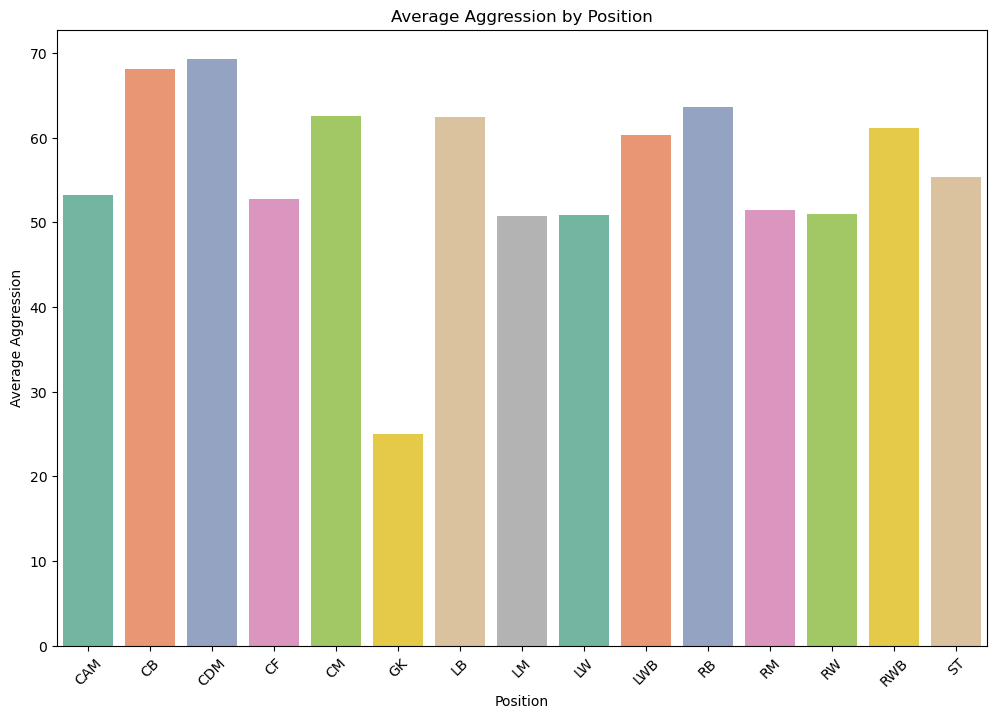

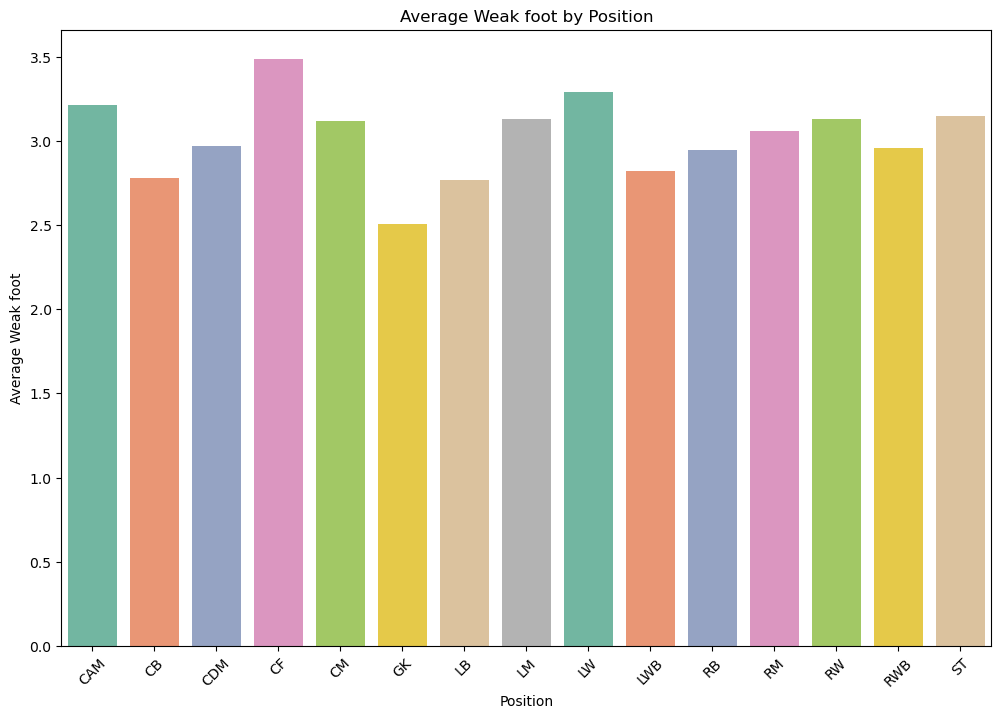

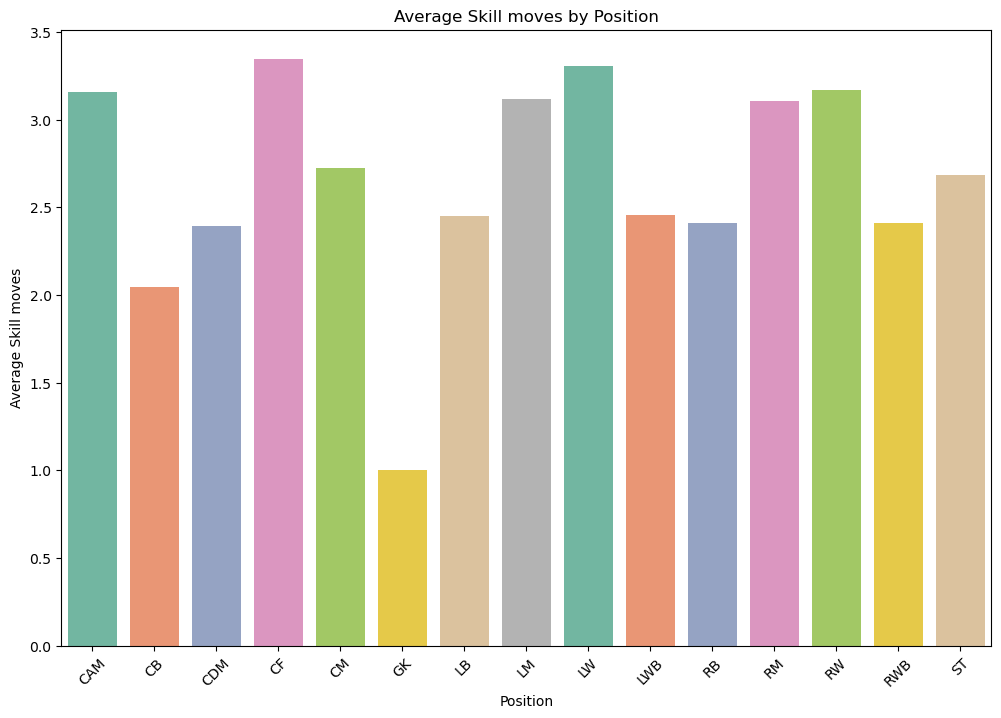

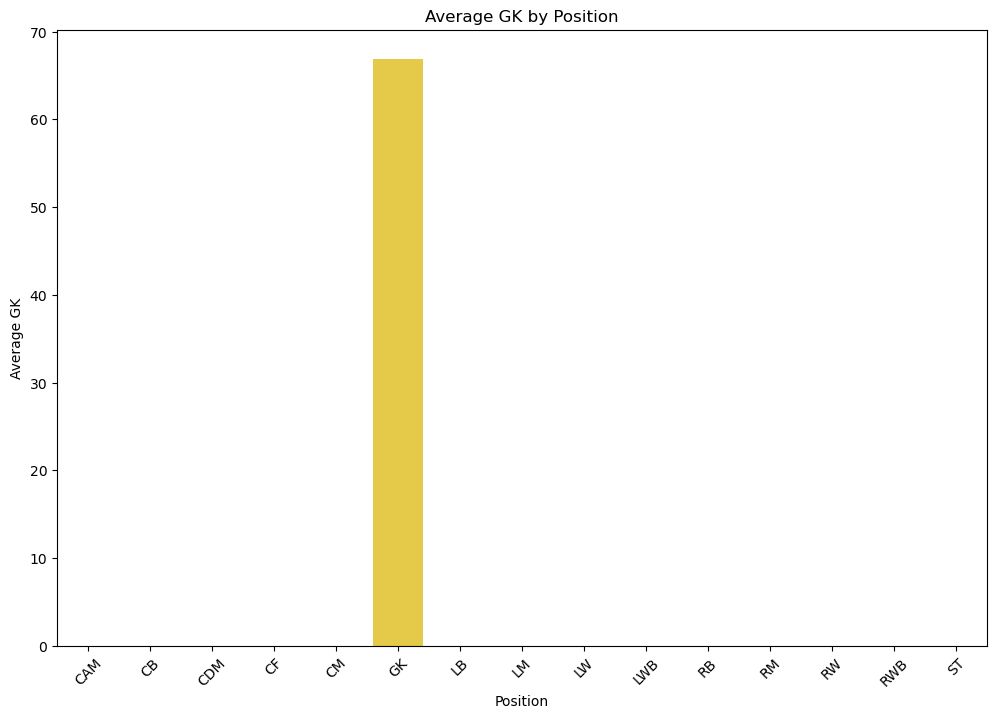

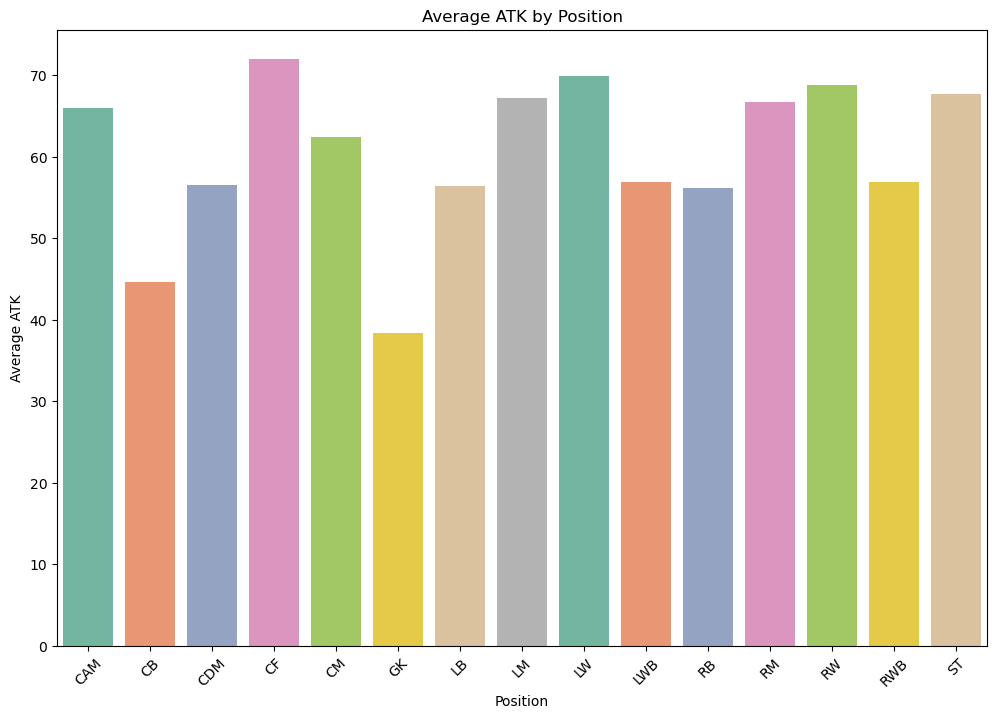

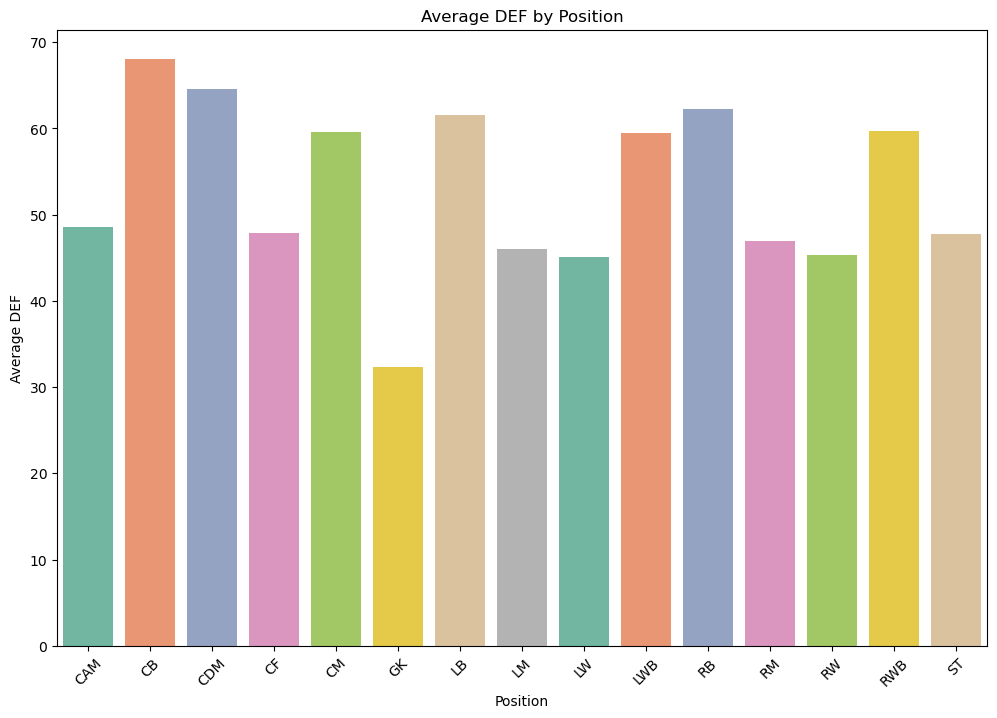

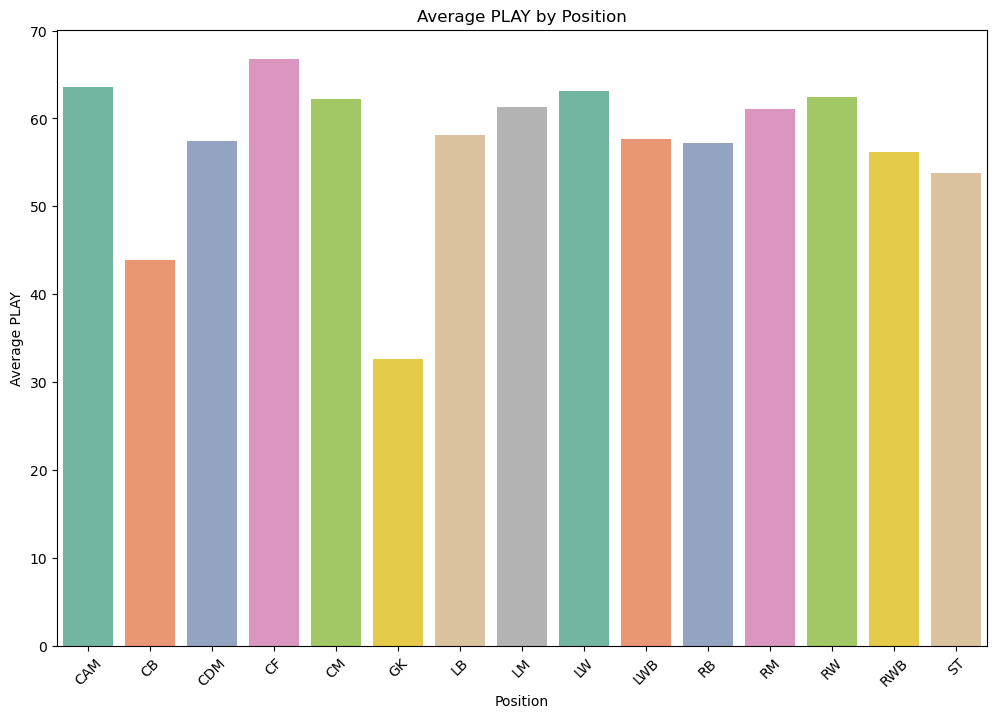

In [25]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[['Position'] + list(numeric_columns)]

# Group by 'Position' and calculate the mean
position_stats = numeric_df.groupby('Position').mean().reset_index()

# Plotting the average statistics by position
plt.figure(figsize=(8, 6))
for column in position_stats.columns[1:]:  # Excluding the 'Position' column
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Position', y=column, data=position_stats, palette='Set2')
    plt.title(f'Average {column} by Position')
    plt.xlabel('Position')
    plt.ylabel('Average ' + column)
    plt.xticks(rotation=45)
    plt.show()


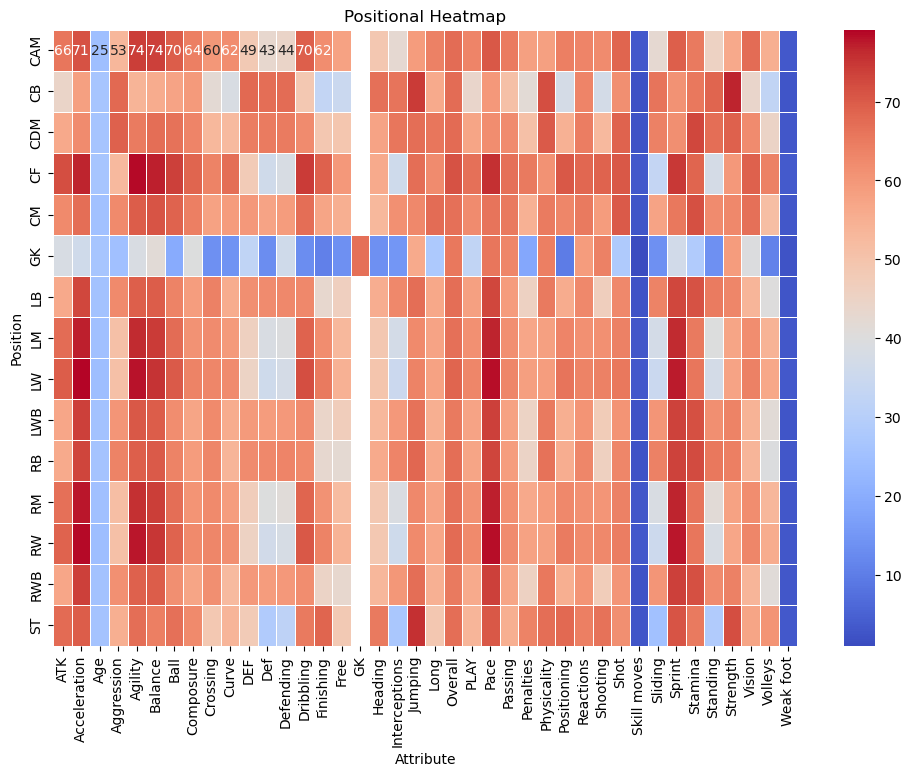

In [26]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[['Position'] + list(numeric_columns)]

# Create the pivot table for the heatmap
position_heatmaps = numeric_df.pivot_table(index='Position', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(position_heatmaps, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Positional Heatmap')
plt.xlabel('Attribute')
plt.ylabel('Position')
plt.show()

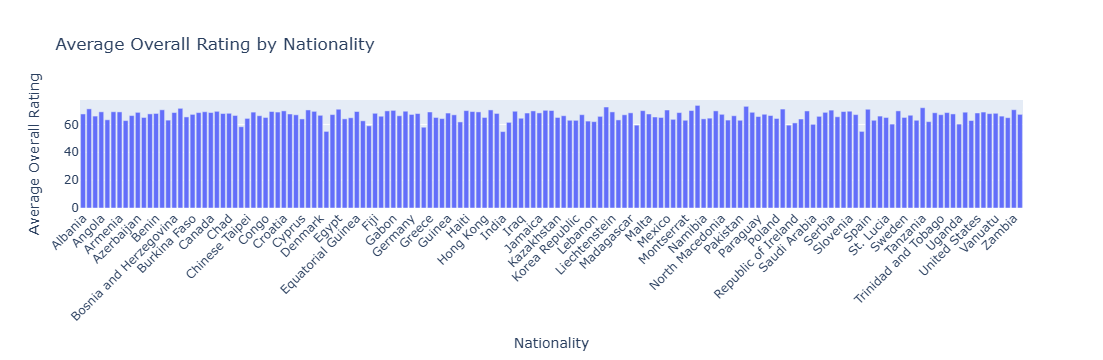

In [27]:
# Select only numeric columns along with 'Nation'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[['Nation'] + list(numeric_columns)]

# Group by 'Nation' and calculate the mean
national_stats = numeric_df.groupby('Nation').mean().reset_index()

# Create a bar plot using plotly
fig = px.bar(national_stats, x='Nation', y='Overall', title='Average Overall Rating by Nationality',
             labels={'Nation': 'Nationality', 'Overall': 'Average Overall Rating'})

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Calculate new features
df['ATK'] = (df['Pace'] + df['Shooting'] + df['Dribbling'] + df['Finishing']) / 4
df['DEF'] = (df['Defending'] + df['Physicality'] + df['Heading'] + df['Interceptions']) / 4
df['PLAY'] = (df['Vision'] + df['Crossing'] + df['Passing'] + df['Curve']) / 4

# Drop irrelevant columns
X = df.drop(['Position', 'Name', 'Nation', 'Club'], axis=1)  # Remove 'Unnamed: 0' from the list
y = df['Position']

# Identify categorical columns
categorical_cols = ['Preferred foot', 'Att work rate', 'Def work rate', 'Gender']

# Encode categorical variables
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)  # drop the first column to avoid multicollinearity
transformer = ColumnTransformer(transformers=[('one_hot', one_hot_encoder, categorical_cols)], remainder='passthrough')
X_encoded = transformer.fit_transform(X)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Accuracy: 0.7184073860357761


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy with Gradient Boosting:", accuracy_gb)

Accuracy with Gradient Boosting: 0.722735141373341


In [30]:
from sklearn.svm import SVC

# Train SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy with SVM:", accuracy_svm)

Accuracy with SVM: 0.7841892671667628


In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from collections import defaultdict


df = pd.read_csv("all_players.csv")


# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# One-hot encode categorical columns
onehot_encoder = OneHotEncoder(drop='first')
ct = ColumnTransformer(transformers=[('onehot', onehot_encoder, categorical_cols)], remainder='passthrough')
df_encoded = ct.fit_transform(df)

# Scale the data
scaler = StandardScaler(with_mean=False)
df_scaled = scaler.fit_transform(df_encoded)

# Apply K-Means clustering
k = 11  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Assign players to clusters
df['Cluster'] = clusters

# Create a dictionary to store players in each cluster
cluster_players = defaultdict(list)
for index, row in df.iterrows():
    cluster_players[row['Cluster']].append(index)

# Function to find the best player in each cluster based on Overall rating
def find_best_player(cluster):
    max_rating = -1
    best_player = None
    for player_idx in cluster_players[cluster]:
        rating = df.loc[player_idx, 'Overall']
        if rating > max_rating:
            max_rating = rating
            best_player = player_idx
    return best_player

# Form the dream team
dream_team = []
for i in range(k):
    best_player_idx = find_best_player(i)
    dream_team.append(best_player_idx)

# Print the dream team
print("Dream Team:")
for player_idx in dream_team:
    print(df.loc[player_idx,'Name'], "-", df.loc[player_idx,'Position'])


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Dream Team:
Thibaut Courtois - GK
Kyle Walker-Peters - RB
Christian Larotonda - CDM
Erling Haaland - ST
Alexia Putellas - CM
Virgil van Dijk - CB
Sam Hoskins - LM
Kylian Mbappé - ST
Millie Bright - CB
Damian Kądzior - RM
Dael Fry - CB


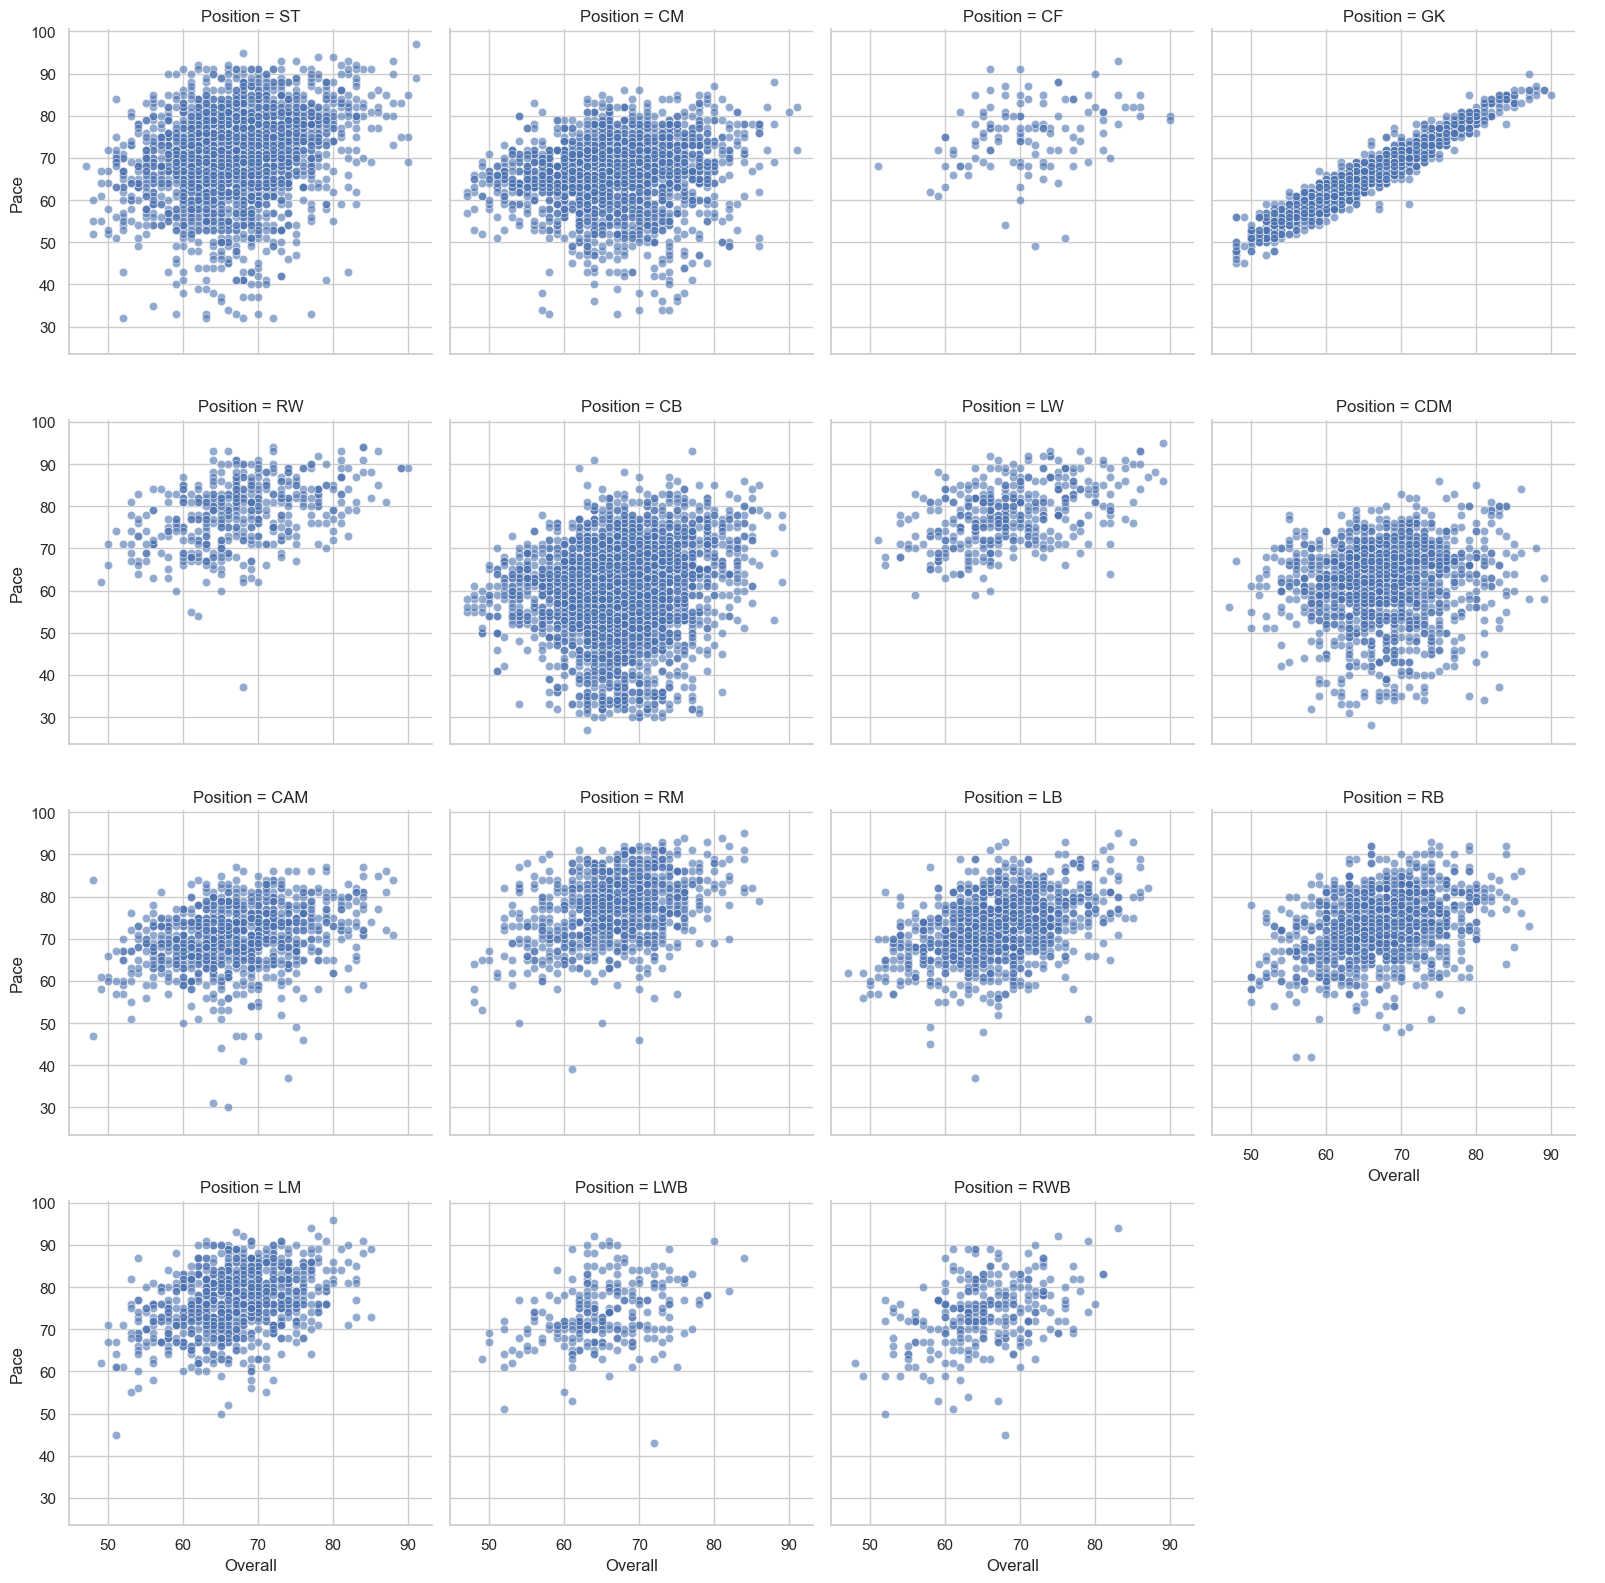

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# FacetGrid Scatter Plots
g = sns.FacetGrid(df, col="Position", col_wrap=4, height=4, aspect=1)
g = g.map(sns.scatterplot, "Overall", "Pace", alpha=0.6)
g.add_legend()

# Display the plot
plt.show()


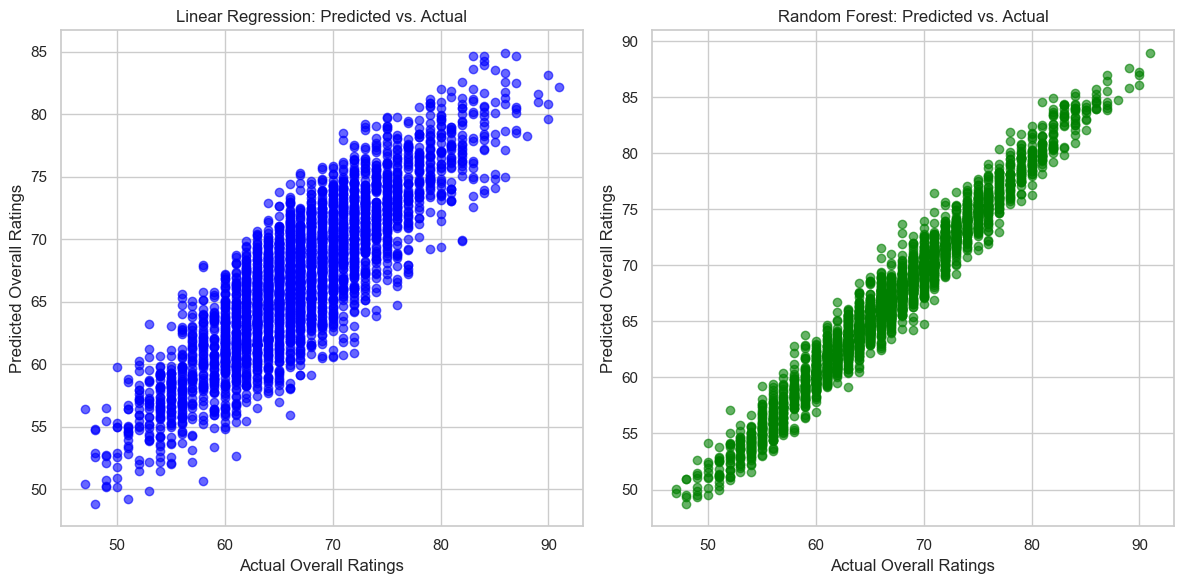

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



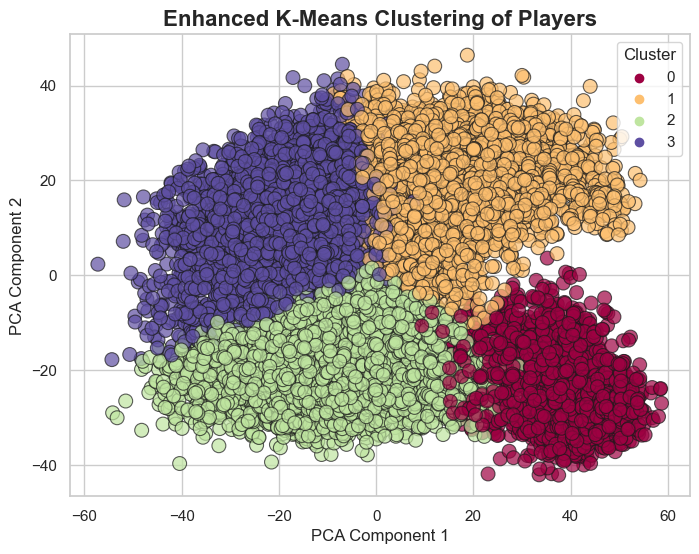

(12.603865217398148,
 0.7408862369056369,
 1.6720232544720137,
 0.9656260813667314)

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'all_players.csv'
data = pd.read_csv(file_path)

# Selecting features and target
features = data[['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']]
target = data['Overall']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Visualizing Predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.xlabel('Actual Overall Ratings')
plt.ylabel('Predicted Overall Ratings')
plt.title('Linear Regression: Predicted vs. Actual')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.xlabel('Actual Overall Ratings')
plt.ylabel('Predicted Overall Ratings')
plt.title('Random Forest: Predicted vs. Actual')

plt.tight_layout()
plt.show()

# Clustering Players
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)
data['Cluster'] = clusters

# PCA for Visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Enhanced Visualization for Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='Spectral', s=100, alpha=0.7, edgecolor='k')
plt.title('Enhanced K-Means Clustering of Players', fontsize=16, fontweight='bold')
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

# Display model evaluation metrics
mse_lr, r2_lr, mse_rf, r2_rf


In [34]:
from mpl_toolkits.mplot3d import Axes3D

# PCA for 3 components
pca_3d = PCA(n_components=3)
pca_features_3d = pca_3d.fit_transform(features)


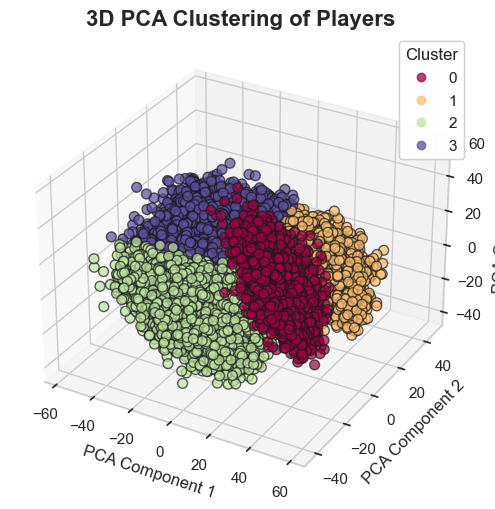

In [35]:
# 3D Scatter Plot for Clustering
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(pca_features_3d[:, 0], pca_features_3d[:, 1], pca_features_3d[:, 2], 
                     c=clusters, cmap='Spectral', s=50, alpha=0.7, edgecolor='k')

# Adding labels and title
ax.set_title('3D PCA Clustering of Players', fontsize=16, fontweight='bold')
ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
ax.set_zlabel('PCA Component 3', fontsize=12)

# Adding legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()


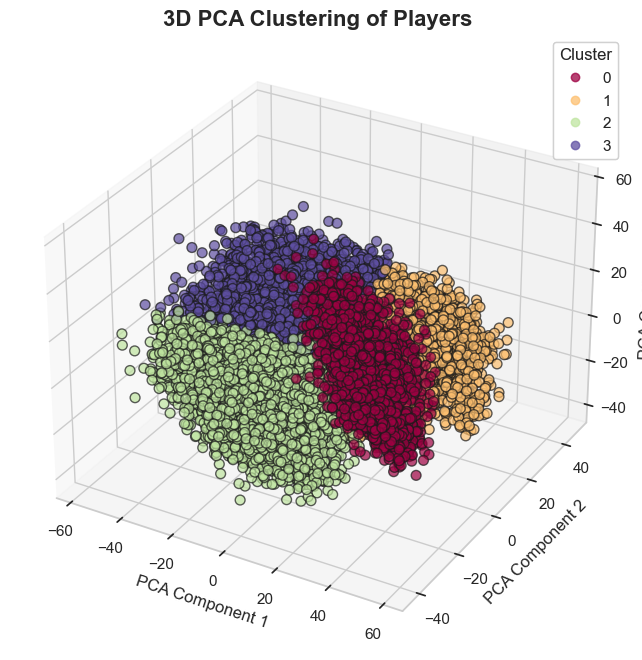

In [36]:
from mpl_toolkits.mplot3d import Axes3D

# PCA for 3 components
pca_3d = PCA(n_components=3)
pca_features_3d = pca_3d.fit_transform(features)

# 3D Scatter Plot for Clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(pca_features_3d[:, 0], pca_features_3d[:, 1], pca_features_3d[:, 2], 
                     c=clusters, cmap='Spectral', s=50, alpha=0.7, edgecolor='k')

# Adding labels and title
ax.set_title('3D PCA Clustering of Players', fontsize=16, fontweight='bold')
ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
ax.set_zlabel('PCA Component 3', fontsize=12)

# Adding legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Collecting the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [mse_lr, mse_rf, mse_gb, mse_svr, mse_xgb],
    'R2': [r2_lr, r2_rf, r2_gb, r2_svr, r2_xgb]
})

# Display the results
print("Model Performance Comparison")
print(results)

Model Performance Comparison
               Model        MSE        R2
0  Linear Regression  12.603865  0.740886
1      Random Forest   1.672023  0.965626
2  Gradient Boosting   2.192884  0.954918
3                SVR   1.691227  0.965231
4            XGBoost   1.737762  0.964275


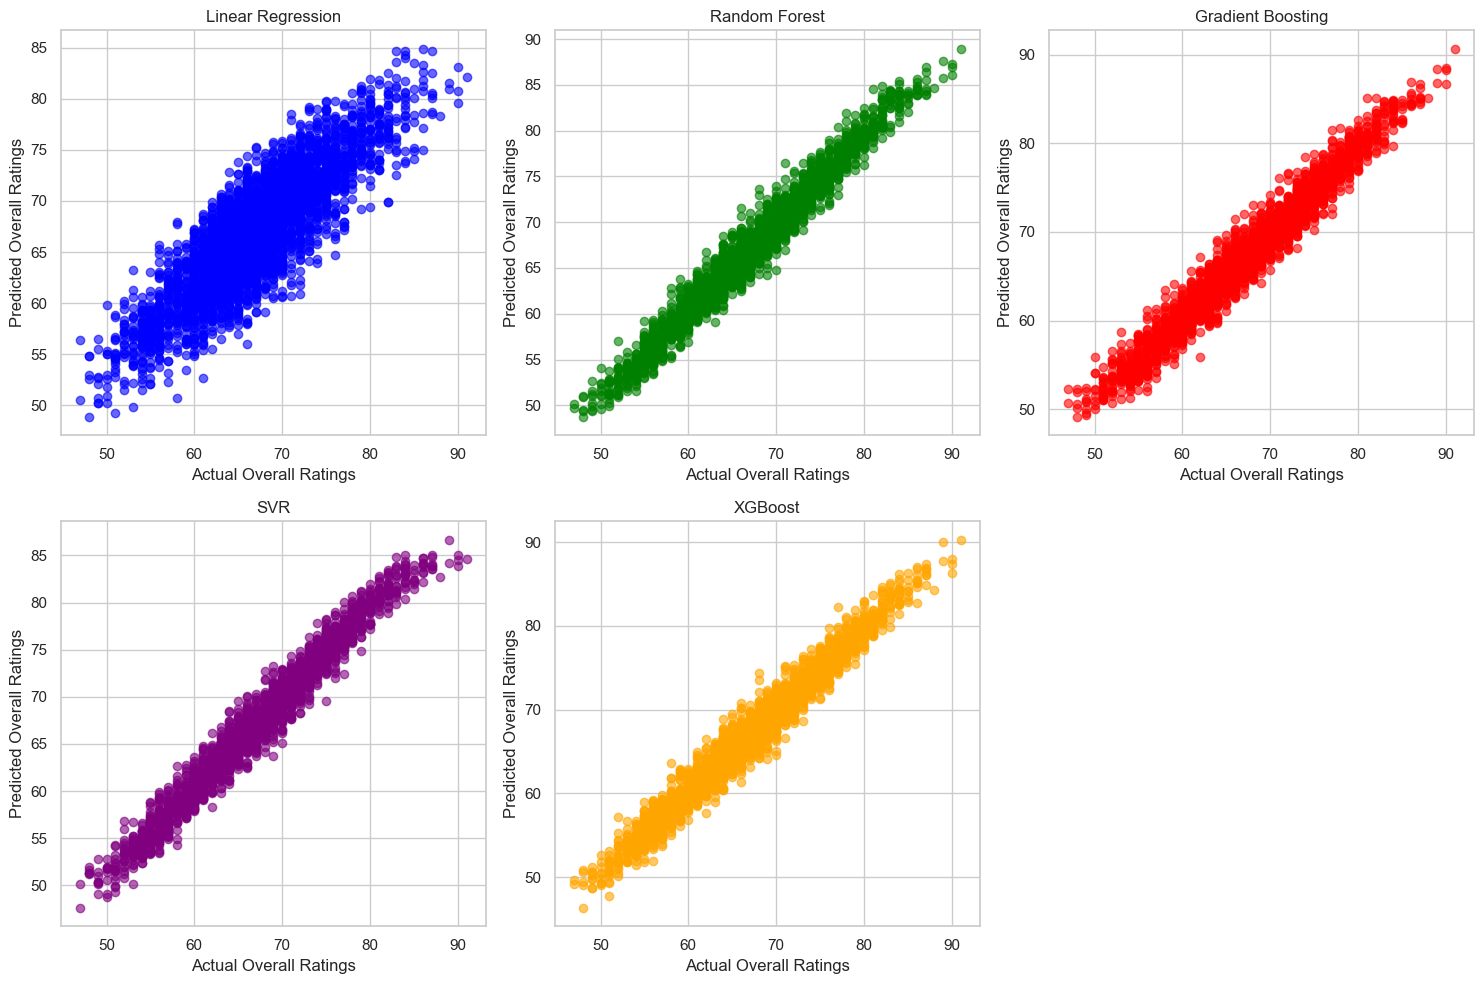

In [38]:
# Visualization of Predictions
plt.figure(figsize=(15, 10))

# Linear Regression
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.xlabel('Actual Overall Ratings')
plt.ylabel('Predicted Overall Ratings')
plt.title('Linear Regression')

# Random Forest
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.xlabel('Actual Overall Ratings')
plt.ylabel('Predicted Overall Ratings')
plt.title('Random Forest')

# Gradient Boosting
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='red')
plt.xlabel('Actual Overall Ratings')
plt.ylabel('Predicted Overall Ratings')
plt.title('Gradient Boosting')

# SVR
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_svr, alpha=0.6, color='purple')
plt.xlabel('Actual Overall Ratings')
plt.ylabel('Predicted Overall Ratings')
plt.title('SVR')

# XGBoost
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='orange')
plt.xlabel('Actual Overall Ratings')
plt.ylabel('Predicted Overall Ratings')
plt.title('XGBoost')

plt.tight_layout()
plt.show()


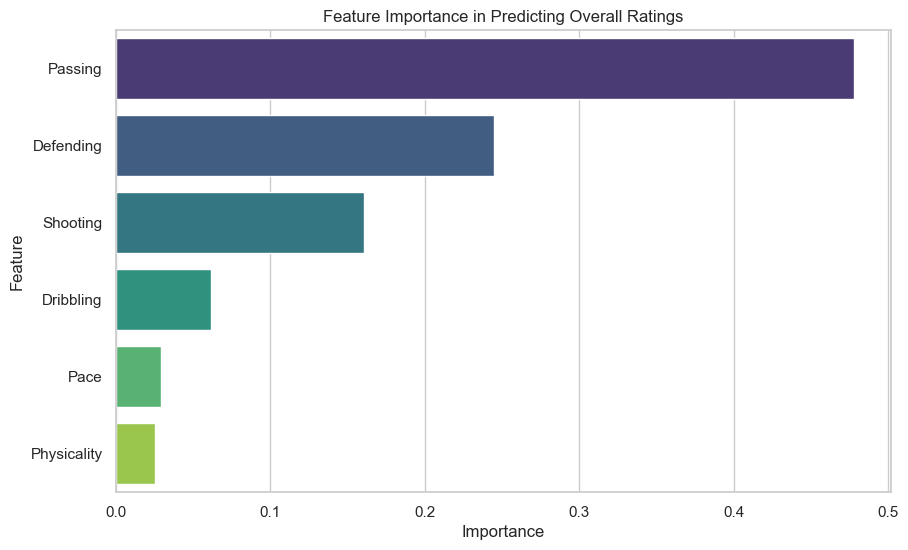

In [39]:
# Feature Importance Analysis
importances = rf_model.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Predicting Overall Ratings')
plt.show()


In [40]:
from sklearn.model_selection import GridSearchCV

# Define a simpler parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'max_depth': 15,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 150},
 0.9640499465067117)

In [41]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std


(0.9643372374244921, 0.0017162053036231441)

100%|===================| 3452/3466 [02:52<00:00]        

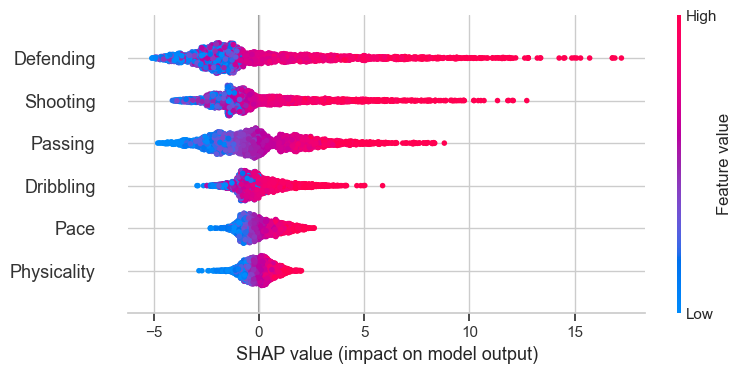

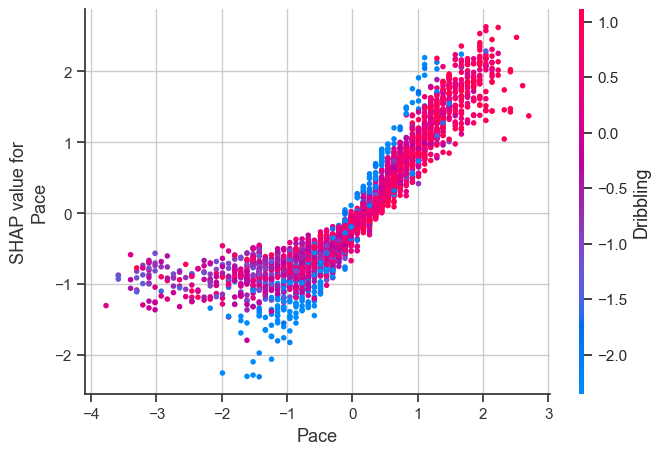

In [42]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(rf_model, X_test_scaled)
shap_values = explainer(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=features.columns)

# Dependence plot for the most important feature
shap.dependence_plot(0, shap_values.values, X_test_scaled, feature_names=features.columns)
